# Programming for Data Science Practical Examination
## Introduction 

The challenge of this pratical is to explore the public procurement data available in the portal www.base.gov.pt. <br>
Public Procurements are contracts establish between a public institutions (the issuer of a procurement) and a third-party supplier. <br>
Each contract is classified using the Common Procurement Vocabulary (CPV). The CPV classification aims at establishing a single classification system for public procurement in Europe, helping in comparative statistics and regulation. The CPV is a five level hierarchical classification encoded in a nine digit string. For instance the first two digits identify the division, the first three the groups, and so on. You can find more information about the CPVs at https://simap.ted.europa.eu/cpv


We will use a sample dataset extracted from the portal BASE (www.base.gov.pt) that contains information on public procurements executed between 2012 and 2014. Below you can find a step-by-step instructions of what the tasks you need to perform in order to analyse this dataset. Each step indicates the amount of points you can score. Make sure you comment all your code and provide, when requested, a discussion about what you have done and the results obtained.

This examination does not intend to test your ability to:<br>
. perform complex data analysis;<br>
. develop complex data-driven models; <br>
. write optimal algorithmic solutions to a problem. <br>

**Instead**, it aims to test your ability to implement a pre-planned step by step project in python.

Your submission will be graded according to the following guidelines:
1. Execution (does your program does what is asked from the exercise?)
2. Objectivity (are you using the adequate libraries? are you using a libraries not in the scope of exercise?)
3. Readibility of your code (is your code correctly documented? is variable naming adequate?)

This is an individual activity!

## Submission Details

The deadline for the submission is November 1st at 23:59, and submission must be done through the corresponding activity in moodle. Your submission should consist of an archive (zip file) containing the following files: <br>
1) A copy of this notebook with your answers; <br>
2) A html version of the notebook with your answers (File -> Download As -> html); <br>
3) An Authorship Statement; <br> 

Submissions done in .rar archives will not be graded. <br>
Submissions delivered that are not in a jupyter notebook format will not be graded.

Good Luck, and enjoy!

**PLEASE FILL THIS INFORMATION IN:** <br>

In [2]:
# Student ID: m20200568
# Student Name: Nadine Aldesouky

## Boilerplate

Before you start, let us make sure you have all the necessary packages in your working environment. To that end run the following cells to install and load all the necessary libraries.

**Note** You only need to run this cell once, not everytime you open the notebook.

In [1]:
import sys
!{sys.executable} -m pip install --upgrade pip --user
!{sys.executable} -m pip install xlrd
!{sys.executable} -m pip install requests
!{sys.executable} -m pip install seaborn

     |████████████████████████████████| 1.5 MB 2.1 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Then we load the necessary libraries to execute each of the steps below.

In [3]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm
import os
from zipfile import ZipFile

In [4]:
import requests

In [5]:
print('Pandas version ',pd.__version__)
print('Numpy version ',np.__version__)
print('Scipy version ',sp.__version__)
print('Seaborn version ',sns.__version__)
print('StatsModels version ',sm.__version__)

Pandas version  1.0.5
Numpy version  1.18.5
Scipy version  1.5.0
Seaborn version  0.10.1
StatsModels version  0.11.1


In the following steps, please used the alias defined at this step. This will help us to correct your answers and track your steps. Students that fail to use the pre-defined aliases will be incur in a penalization. 

Finally, the following cell downloads the dataset for this project. <br>

In [ ]:
r = requests.get('https://www.dropbox.com/s/r5hknwep5nq2gu9/PDS2020_Data.zip?dl=1', allow_redirects=True)
open('Data.zip', 'wb').write(r.content);
with ZipFile('Data.zip', 'r') as zipObj:
    zipObj.extractall('DATA')

The above code will store the datafiles in a folder called "DATA" that is in the same filepath as this notebook. <br>
The dataset consists of three xlsx files containing all contracts available in 2018 concerning the contracts issued in 2012, 2013, and 2014 that where available in BASE.

## Exercises (The action starts here)

<b>[Step 1. | 0.5 points ]</b> Load all the procurement datafiles (contratos2012.xlsx, contratos2013.xlsx, and contratos2014.xlsx) into a single dataframe named <i>data</i>.<br>
Notes: This operation might take a while. When reading data from excel it is safer to always specify the Sheet you want to read. You might need to reset the indexes and drop a column of the final dataframe to obtain a more workable dataframe.

In [6]:
#Reaching the folder DATA to read the files there

path=os.getcwd()  #get the current working directory
print(path)
mypath=os.path.join("..","EXAM","DATA")    #join it with the directory which includes the DATA file, so the path after you open the DATA file
print(mypath)
files=os.listdir(mypath)                   #list the files in that directory
print(files)
file=[file for file in files if file[:9]=='contratos']    #assign the excel files that have the word contratos at the beginning of their name to the variable file
print(file)

/Users/Nadine/Desktop/Portugal/NOVA IMS/Programming for Data Science/EXAM
../EXAM/DATA
['contratos2014.xlsx', 'contratos2012.xlsx', 'contratos2013.xlsx', '__MACOSX']
['contratos2014.xlsx', 'contratos2012.xlsx', 'contratos2013.xlsx']


In [7]:
#Load the files into a single dataframe called data

data = pd.DataFrame()   #create an empty dataframe to store our dataset in
for item in file:       #iterate through file, so for every item or file in the list of all the contratos excel files
    df=pd.read_excel('DATA/'+item,'Folha1')   #load the sheet Folha1 of every excel file and store it in the variable df
    data=df.append(data,ignore_index=True)    #add df to our data dataframe

#ignore_index resets the index (and ignores the old one) so that we dont have to add another index column through 
#reset_index then drop the old index col

In [8]:
data.head()  #check that I loaded the correct dataset and there is no formatting problems by showing the top 5 rows

,idcontrato,nAnuncio,tipoContrato,tipoprocedimento,objectoContrato,adjudicantes,adjudicatarios,dataPublicacao,dataCelebracaoContrato,precoContratual,cpv,prazoExecucao,localExecucao,fundamentacao
0,845377,4828/2009,Empreitadas de obras públicas,Concurso público,AMBIENTE EM MATOSINHOS – CASA MORTUÁRIA DE LAVRA,501305912 - Município de Matosinhos,"500687030 - Valentim José Luís &amp; Filhos, S.A.",2013-10-03,2013-08-05,297423.55,45214200-2 - Construção de edifícios escolares,240,"Portugal, Porto, Matosinhos","Artigo 19.º, alínea b) do Código dos Contratos..."
1,1208066,4979/2009,Aquisição de serviços,Concurso público,Fornecimento de Estudos de identificação e car...,600082490 - Autoridade Nacional de Protecção C...,505443856 - Metacortex - Consultoria e Modelaç...,2014-09-10,2013-08-30,282000.00,73000000-2 - Serviços de investigação e desenv...,177,"Portugal, Lisboa, Oeiras","Artigo 20.º, n.º 1, alínea b) do Código dos Co..."
2,972095,NaN,Aquisição de serviços,Ajuste Direto Regime Geral,Prédio n.º 252 Reabilitação e Remodelação da C...,500745471 - Santa Casa da Misericórdia de Lisboa,232695377 - Pedro Filipe Pinto Barbosa,2014-02-05,2013-06-20,19500.00,50000000-5 - Serviços de reparação e manutenção,79,"Portugal, Lisboa, Lisboa","Artigo 20.º, n.º 1, alínea a) do Código dos Co..."
3,750292,NaN,Concessão de serviços públicos,Concurso público,Concessão da exploração do bar e parque de cam...,512044023 - Município da Praia da Vitória,205150349 - César Miguel Nunes Cota,2013-04-30,2013-04-23,160.00,65000000-3 - Serviços públicos,365,"Portugal, Região Autónoma dos Açores, Praia da...","Artigo 31.º, n.º 1 do Código dos Contratos Púb..."
4,738435,767/2010,Empreitadas de obras públicas,Concurso público,EN218 - BENEFICIAÇÃO ENTRE RIO FRIO E OUTEIRO,"504598686 - EP - ESTRADAS DE PORTUGAL, S.A","500072868 - CONSTRUÇÕES GABRIEL A.S. COUTO, S.A.",2013-04-10,2013-04-05,272654.26,45233120-6 - Construção de estradas,120,"Portugal, Braganca, Vimioso","Artigo 19.º, alínea b) do Código dos Contratos..."


<b>[Step 2. | 0.5 points ]</b> Perform some quick inspection of the data file in order to answer the following questions:
1. How many records does the dataset include?

In [9]:
#returns the shape of the dataframe as (number of records or rows, number of columns or fields)
data.shape

print('The dataset has',data.shape[0],'records')

The dataset has 250092 records


2. What are the fields names?

In [10]:
#returns the names of the columns or fields
data.columns.values 

array(['idcontrato', 'nAnuncio', 'tipoContrato', 'tipoprocedimento',
       'objectoContrato', 'adjudicantes', 'adjudicatarios',
       'dataPublicacao', 'dataCelebracaoContrato', 'precoContratual',
       'cpv', 'prazoExecucao', 'localExecucao', 'fundamentacao'],
      dtype=object)

3. What are the datatypes of each field?

In [11]:
#returns the datatype of each column or field
data.dtypes

idcontrato                         int64
nAnuncio                          object
tipoContrato                      object
tipoprocedimento                  object
objectoContrato                   object
adjudicantes                      object
adjudicatarios                    object
dataPublicacao            datetime64[ns]
dataCelebracaoContrato    datetime64[ns]
precoContratual                  float64
cpv                               object
prazoExecucao                      int64
localExecucao                     object
fundamentacao                     object
dtype: object

<b>[Step 3. | 3 points ]</b> As you have probably noticed our raw data is not exactly the cleanest dataset in the block. Indeed, we will need to perform some parsing in order to obtain a good working data. In that sense, write the necessary code to perform the following steps: <br>
1. Break the field <i>cpv</i> into two columns named <i>cpvDOC</i> and <i>CPV</i>.<br>
   The field <i>cpvDOC</i> should retain the CPV id, while the <i>CPV</i> its Description <br>
   For instance, a record with value "72416000-9, Fornecedores de aplicações" should lead to a <i>cpvDOC</i> equal to "72416000-9" and a <i>CPV</i> would be equal to "Fornecedores de aplicações" <br>
Use the head command to display the top 10 rows of these new columns (and only these new columns).

In [12]:
#create 2 columns out of the cpv column by turning the column into a string which we split when there is a space
data['cpvDOC'],data['CPV']=data['cpv'].str.split(' ', 1).str 

#clean up the CPV column by getting rid of the '-' at the beginning of each entry and replacing it with nothing
data['CPV']=data['CPV'].str.replace("-","")

<ipython-input-12-1553efb5dfed>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['cpvDOC'],data['CPV']=data['cpv'].str.split(' ', 1).str


In [13]:
#return the top 10 rows of the cpvDOC and CPV column
data[['cpvDOC','CPV']].head(10)

,cpvDOC,CPV
0,45214200-2,Construção de edifícios escolares
1,73000000-2,Serviços de investigação e desenvolvimento e ...
2,50000000-5,Serviços de reparação e manutenção
3,65000000-3,Serviços públicos
4,45233120-6,Construção de estradas
5,75200000-8,Prestação de serviços à comunidade
6,72611000-6,Serviços de assistência técnica informática
7,45200000-9,Obras de construção total ou parcial e de eng...
8,34000000-7,Equipamento e produtos auxiliares de transporte
9,73000000-2,Serviços de investigação e desenvolvimento e ...


2. Convert any fields with dates to datetime objects. Show the datatypes for all fields after your conversion.<br>
**Tip:** You might want to check Lab 7 for some tips regarding datetime conversion 



In [14]:
#Looking at Step 2 Question 3, the dates columns are already in datetime format however, I went through the process of
#typecasting them again just for the purpose of answering the question

#import necessary libraries
from datetime import datetime
import calendar

#typecast values of column to string
data["dataPublicacao"] = data["dataPublicacao"].astype(str)

#edit this string to have a date format by spliting it then typecasting it into a datetime object using the strptime method
data["dataPublicacao"] = data["dataPublicacao"].map(lambda x: datetime.strptime(x.split()[0], '%Y-%m-%d'))


In [15]:
#check the type of the column after editing
data["dataPublicacao"].dtypes

dtype('<M8[ns]')

In [16]:
#typecast values of column to string
data["dataCelebracaoContrato"] = data["dataCelebracaoContrato"].astype(str)

#edit this string to have a date format by spliting it then typecasting it into a datetime object using the strptime method
data["dataCelebracaoContrato"] = data["dataCelebracaoContrato"].map(lambda x: datetime.strptime(x.split()[0], '%Y-%m-%d'))

In [17]:
#check the type of the column after editing
data["dataCelebracaoContrato"].dtypes

dtype('<M8[ns]')

In [18]:
#Show the datatypes for all fields after conversion:
data.dtypes

idcontrato                         int64
nAnuncio                          object
tipoContrato                      object
tipoprocedimento                  object
objectoContrato                   object
adjudicantes                      object
adjudicatarios                    object
dataPublicacao            datetime64[ns]
dataCelebracaoContrato    datetime64[ns]
precoContratual                  float64
cpv                               object
prazoExecucao                      int64
localExecucao                     object
fundamentacao                     object
cpvDOC                            object
CPV                               object
dtype: object

3. In the fields <i>adjudicantes</i> (issuers) and <i>adjudicatários</i> (suppliers) you should have noticed that it includes both the name and the fiscal numbers (NIF) of the participating institutions.<br>
   For each of those two fields, split each record into two new fields. <br>
   <i>Entidade adjudicante - Nome, NIF</i> split into <i>issuerNIF</i> and <i>issuerName</i>.<br>
   <i>Entidade adjudicatária - Nome, NIF</i> split into <i>supplierNIF</i> and <i>supplierName</i>.<br>
   You will find that in some cases there are multiple entities in those fields, which are separated by "|". Explain how have you worked around such cases? If you are not able to perform this, feel free to ignore/drop the records that have multiple entities in each of those fields, but report what is the percentage of procurements that you would be dropping.

In [19]:
#multiple entities in adjudicatarios

#find the number of rows which contain multiple entities ('|') in their adjudicatarios column then divide it by the 
#total number of rows in the dataset to get the proportion
proportion1=len(data[data['adjudicatarios'].str.contains(r"\|",na=False)])/len(data)
proportion1

0.012343457607600403

In [20]:
#multiple entities in adjudicantes

#find the number of rows which contain multiple entities ('|') in their adjudicantes column then divide it by the 
#total number of rows in the dataset to get the proportion
proportion2=len(data[data['adjudicantes'].str.contains(r"\|",na=False)])/len(data)
proportion2

0.003806599171504886

In [21]:
#total proportion of data to be dropped

#multiply each of the proportions by 100 and add them up to get the total percentage to drop from the dataset
percentage_to_drop=(proportion1*100)+(proportion2*100)
print('The percentage of procurements that I would be dropping is',percentage_to_drop,'%')

The percentage of procurements that I would be dropping is 1.615005677910529 %


<font color='darkblue'> 
Given the time constraints of this exam and the analysis needed in the following questions, I have decided to drop these values. Since, the percentage of procurements with multiple entities is so low, it won't have a significant effect on my analysis so I will drop them.
</font> 

In [22]:
#drop the rows which have multiple entities by negating them so by making the data dataframe only contain the rows
#that do not have multiple vlaues using the sign ~

data = data[~data['adjudicatarios'].str.contains(r"\|", na=False)]
data = data[~data['adjudicantes'].str.contains(r"\|", na=False)]
data

,idcontrato,nAnuncio,tipoContrato,tipoprocedimento,objectoContrato,adjudicantes,adjudicatarios,dataPublicacao,dataCelebracaoContrato,precoContratual,cpv,prazoExecucao,localExecucao,fundamentacao,cpvDOC,CPV
0,845377,4828/2009,Empreitadas de obras públicas,Concurso público,AMBIENTE EM MATOSINHOS – CASA MORTUÁRIA DE LAVRA,501305912 - Município de Matosinhos,"500687030 - Valentim José Luís &amp; Filhos, S.A.",2013-10-03,2013-08-05,297423.55,45214200-2 - Construção de edifícios escolares,240,"Portugal, Porto, Matosinhos","Artigo 19.º, alínea b) do Código dos Contratos...",45214200-2,Construção de edifícios escolares
1,1208066,4979/2009,Aquisição de serviços,Concurso público,Fornecimento de Estudos de identificação e car...,600082490 - Autoridade Nacional de Protecção C...,505443856 - Metacortex - Consultoria e Modelaç...,2014-09-10,2013-08-30,282000.00,73000000-2 - Serviços de investigação e desenv...,177,"Portugal, Lisboa, Oeiras","Artigo 20.º, n.º 1, alínea b) do Código dos Co...",73000000-2,Serviços de investigação e desenvolvimento e ...
2,972095,NaN,Aquisição de serviços,Ajuste Direto Regime Geral,Prédio n.º 252 Reabilitação e Remodelação da C...,500745471 - Santa Casa da Misericórdia de Lisboa,232695377 - Pedro Filipe Pinto Barbosa,2014-02-05,2013-06-20,19500.00,50000000-5 - Serviços de reparação e manutenção,79,"Portugal, Lisboa, Lisboa","Artigo 20.º, n.º 1, alínea a) do Código dos Co...",50000000-5,Serviços de reparação e manutenção
3,750292,NaN,Concessão de serviços públicos,Concurso público,Concessão da exploração do bar e parque de cam...,512044023 - Município da Praia da Vitória,205150349 - César Miguel Nunes Cota,2013-04-30,2013-04-23,160.00,65000000-3 - Serviços públicos,365,"Portugal, Região Autónoma dos Açores, Praia da...","Artigo 31.º, n.º 1 do Código dos Contratos Púb...",65000000-3,Serviços públicos
4,738435,767/2010,Empreitadas de obras públicas,Concurso público,EN218 - BENEFICIAÇÃO ENTRE RIO FRIO E OUTEIRO,"504598686 - EP - ESTRADAS DE PORTUGAL, S.A","500072868 - CONSTRUÇÕES GABRIEL A.S. COUTO, S.A.",2013-04-10,2013-04-05,272654.26,45233120-6 - Construção de estradas,120,"Portugal, Braganca, Vimioso","Artigo 19.º, alínea b) do Código dos Contratos...",45233120-6,Construção de estradas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250087,5326806,NaN,Aquisição de serviços,Ao abrigo de acordo-quadro (art.º 258.º),Fornecimento de refeições aos doentes do HSEIT...,512105030 - Hospital de Santo Espírito da Ilha...,500347506 - EUREST (PORTUGAL) - Sociedade Euro...,2019-03-08,2014-12-01,43358.97,"55000000-0 - Serviços de hotelaria, restauraçã...",30,"Portugal, Região Autónoma dos Açores, Angra do...","Artigo 20.º, alínea a) do Decreto Legislativo ...",55000000-0,"Serviços de hotelaria, restauração e comércio..."
250088,5414071,NaN,Aquisição de bens móveis,Ajuste Direto Regime Geral,Aquisição de viaturaMarca Isuzo Modelo D-Max,510839959 - União das Freguesias de São Pedro ...,509008380 - Freguesia de Carvalho,2019-03-26,2014-04-14,14500.00,34113200-4 - Veículos 4X4,30,"Portugal, Coimbra, Penacova","Artigo 20.º, n.º 1, alínea a) do Código dos Co...",34113200-4,Veículos 4X4
250089,5490660,NaN,Aquisição de serviços,Ajuste Direto Regime Geral,Serviço de transporte escolar regular para o a...,512048746 - Associação de Desenvolvimento da I...,512001812 - Rumo à Natureza Unipessoal,2019-04-15,2014-11-03,92594.80,60000000-8 - Serviços de transporte (excl. tra...,350,"Portugal, Região Autónoma dos Açores, Calheta ...","Artigo 24.º, n.º 1, alínea e) do Código dos Co...",60000000-8,Serviços de transporte (excl. transporte de r...
250090,5609840,NaN,Aquisição de serviços,Ajuste Direto Regime Geral,AQUISIÇÃO DE SERVIÇOS DE SERVIÇOS DE ASSISTÊNC...,600084264 - Agrupamento de Escolas Abade de Ba...,506345564 - Solemp-Informática,2019-06-03,2014-01-31,4020.00,72200000-7 - Serviços de consultoria e de prog...,365,"Portugal, Braganca, Bragança","Artigo 20.º, n.º 1, alínea a) do Código dos Co...",72200000-7,Serviços

In [23]:
#create 2 columns out of the adjudicantes column by turning the column into a string which we split when there is a space
data['issuerNIF'],data['issuerName']=data['adjudicantes'].str.split(' ', 1).str 

#create 2 columns out of the adjudicatários column by turning the column into a string which we split when there is a space
data['supplierNIF'],data['supplierName']=data['adjudicatarios'].str.split(' ', 1).str 

<ipython-input-23-dedb35fbe729>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['issuerNIF'],data['issuerName']=data['adjudicantes'].str.split(' ', 1).str
<ipython-input-23-dedb35fbe729>:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['supplierNIF'],data['supplierName']=data['adjudicatarios'].str.split(' ', 1).str


<font color='darkblue'>
I did some more parsing because I felt it was necessary especially for my analysis that follows in the upcoming questions...
</font> 

In [24]:
#show a summary description of the dataframe with min, max, mean etc of each of the numerical columns
data.describe()

,idcontrato,precoContratual,prazoExecucao
count,2.460810e+05,2.460810e+05,2.460810e+05
mean,9.755485e+05,4.505873e+04,1.799720e+03
std,3.914110e+05,4.228564e+05,3.910518e+05
min,1.155680e+05,-2.500000e+05,0.000000e+00
25%,7.058850e+05,2.828360e+03,2.000000e+01
50%,9.226740e+05,9.622800e+03,6.000000e+01
75%,1.175681e+06,2.620000e+04,3.200000e+02
max,5.642823e+06,1.052248e+08,1.507192e+08


<font color='darkblue'>
I notice that the precoContratual column has a negative value as its minimum. This doesn't make sense because the price of a contract cannot be negative, you don't receive money for a procurement contract you pay for one. So it cannot have a negative or 0 value bcause it's not free. As a result, I will check how much of my dataset has this 'mistake' to decide whether or not it is safe to drop those entries.
</font> 

In [25]:
#proportion of data with negative or 0 precoContratual values
proportion3=len(data[data['precoContratual']<=0])/len(data)
proportion3

0.0029827577098597616

In [26]:
#This is only about 0.3% of my data so it makes sense to delete it by only keeping rows that have precoContratual 
#values greater than 0
data = data.loc[data['precoContratual']>0]

<font color='darkblue'>
Additionally, the prazoExecucao column seems to have a minimum value of 0 which does not make sense because the duration of a contract cannot be 0 days or months or years...
</font> 

In [27]:
#proportion of data with 0 prazoExecucao values
proportion4=len(data[data['prazoExecucao']==0])/len(data)
proportion4

0.00345632919905277

In [28]:
#This is only about 0.3% of my data so it makes sense to delete it by only keeping the rows with a contract duration 
#more than 0
data = data.loc[data['prazoExecucao']>0]

<font color='darkblue'>
Additionally, I assumed that this column represents the duration of the contract in days which is why I will keep the higher values. However, it looks like the max is 150719200 days which is around 400000 years which seems completely unreasonable. Thus, I will draw a disribution plot to see what would be a good cutoff range to drop the unreasonably large values from my dataset.
</font> 

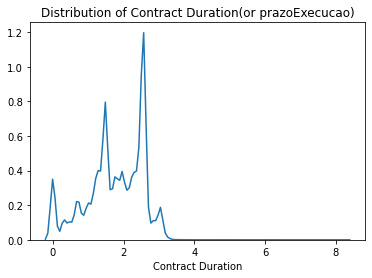

In [29]:
#distribution plot of the log base 10 of prazoExecucao column
plt.title('Distribution of Contract Duration(or prazoExecucao)')           #title of plot
x = np.log10(list(filter(lambda x: x>0, data['prazoExecucao'].values)))    #data to plot
x = pd.Series(x, name="Contract Duration")                                 #x=axis label
ax = sns.distplot(x,hist=False)                                            #remove built-in histogram, only keep line in plot

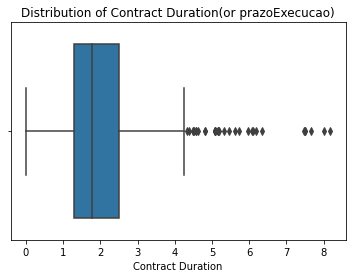

In [30]:
#box plot of the log base 10 of prazoExecucao column to show its distribution of values as well
plt.title('Distribution of Contract Duration(or prazoExecucao)')       #title of plot
sns.boxplot(x)

In [31]:
#looking at those graph it seems reasonable to drop values that are greater than 10**4
proportion5=len(data[data['prazoExecucao']>10000])/len(data)
proportion5

0.00024130978040809984

In [32]:
#This is only 0.02% of my data so it makes sense to delete it by only keeping rows with prazoExecucao values less 
#than 10000
data = data.loc[data['prazoExecucao']<10000]

In [33]:
#show important information about each column (including data type, null values...)
data.info()

#The column nAnuncio seems to have relatively very few values (only 15647 out of 244440 which is only 6% of the data)
#As a result I will drop this column since it has too many missing (or null) values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244440 entries, 0 to 250091
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   idcontrato              244440 non-null  int64         
 1   nAnuncio                15647 non-null   object        
 2   tipoContrato            244440 non-null  object        
 3   tipoprocedimento        244440 non-null  object        
 4   objectoContrato         244424 non-null  object        
 5   adjudicantes            244440 non-null  object        
 6   adjudicatarios          244435 non-null  object        
 7   dataPublicacao          244440 non-null  datetime64[ns]
 8   dataCelebracaoContrato  244440 non-null  datetime64[ns]
 9   precoContratual         244440 non-null  float64       
 10  cpv                     244384 non-null  object        
 11  prazoExecucao           244440 non-null  int64         
 12  localExecucao           244440

In [34]:
#drop the nAnuncio column
data=data.drop(['nAnuncio'],axis=1)

4. Verify that the parsing was successful 

In [35]:
data.describe() #no more extreme or nonsense values

,idcontrato,precoContratual,prazoExecucao
count,2.444400e+05,2.444400e+05,244440.000000
mean,9.755285e+05,4.533116e+04,177.944097
std,3.914749e+05,4.242569e+05,252.970539
min,1.155680e+05,4.500000e-03,1.000000
25%,7.060562e+05,2.936000e+03,20.000000
50%,9.223405e+05,9.715180e+03,60.000000
75%,1.175504e+06,2.643331e+04,320.000000
max,5.642823e+06,1.052248e+08,9125.000000


In [36]:
data.shape   #initially had 250092 records

(244440, 19)

In [37]:
#show the first row of our dataset in transpose...you can see the additional columns we made, the ones we split,
#you can see the columnswe dropped, you can see the data formatted columns, you don't see multiple entries...


#Yes, the parsing was successful...
data.iloc[1:2].T

,1
idcontrato,1208066
tipoContrato,Aquisição de serviços
tipoprocedimento,Concurso público
objectoContrato,Fornecimento de Estudos de identificação e car...
adjudicantes,600082490 - Autoridade Nacional de Protecção C...
adjudicatarios,505443856 - Metacortex - Consultoria e Modelaç...
dataPublicacao,2014-09-10 00:00:00
dataCelebracaoContrato,2013-08-30 00:00:00
precoContratual,282000
cpv,73000000-2 - Serviços de investigação e desenv...


<b>[Step 4. | 5 points ]</b> Let us do some exploratory analysis of the data. The goals is to develop some familarity with the data, which we will do by answering some simple questions. Knowing which questions to ask is an important step for any successful data science project. In that sense, write down the necessary code to answer the following questions:

(Report the results using a meaningful visualization.)

1. What is the total value of procurements per month?

In [38]:
#I assumed that the dataCelebracaoContrato would be reasonable to use since it's the date the contract was signed
#and based on some googling, generally this is the date used rather than date of publication

#create a dataframe that only contains the dataCelebracaoContrato and precoContratual columns
value=data.loc[:,["dataCelebracaoContrato","precoContratual"]]

#create an index column for this dataframe with only the month 
value.ind = value["dataCelebracaoContrato"].map(lambda x: x.month)

#group the values by their index (per month) and then sum their price (aka sum their associated values in the 
#precoContratual column) then save it in the variable ser (meaning series)
ser=value["precoContratual"].groupby(by=value.ind).sum()
ser

<ipython-input-38-d84c7d5b2a29>:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  value.ind = value["dataCelebracaoContrato"].map(lambda x: x.month)


dataCelebracaoContrato
1     9.442482e+08
2     9.036491e+08
3     9.138120e+08
4     7.728192e+08
5     8.982662e+08
6     9.632869e+08
7     9.624684e+08
8     8.117107e+08
9     8.999250e+08
10    9.076159e+08
11    9.918124e+08
12    1.111135e+09
Name: precoContratual, dtype: float64

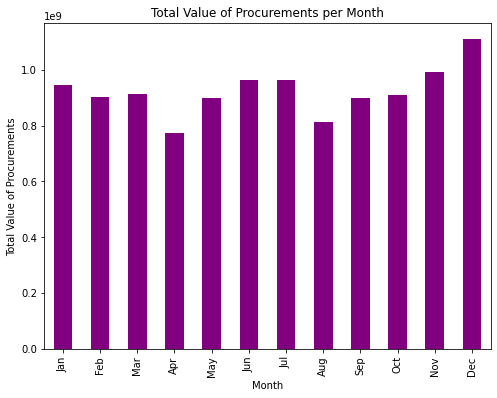

In [39]:
#visualize the above created series

plt.figure(figsize=(8,6))                        #specify the size of the graph
monthplot=ser.plot.bar(color='purple')           #specify data to plot, type of graph and colour while saving it in a variable

#specify how many ticks should be on the x axis and what are their labels
plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))

#specify the axis labels and title of plot
monthplot.set(xlabel='Month',ylabel='Total Value of Procurements',title='Total Value of Procurements per Month')

plt.show()


2. How many procurements have been issued per each month of the year?

In [40]:
#create an index column for the above dataframe with the year and month 
value.ind2 = value["dataCelebracaoContrato"].map(lambda x:100*x.year+ x.month)

#group the values by their index (per month per year) and then count to know the number of elements (aka count 
#their associated entries in the precoContratual column) then save it in the variable ser2 (meaning series2)
ser2=value["precoContratual"].groupby(by=value.ind2).count()
ser2

<ipython-input-40-0d6192134330>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  value.ind2 = value["dataCelebracaoContrato"].map(lambda x:100*x.year+ x.month)


dataCelebracaoContrato
201201     5457
201202     5359
201203     5388
201204     4293
201205     5255
201206     4826
201207     4768
201208     4305
201209     5245
201210     5541
201211     5564
201212     6817
201301     6595
201302     6018
201303     6356
201304     5833
201305     6918
201306     6144
201307     7615
201308     6041
201309     7614
201310     6402
201311     6623
201312     9074
201401    11665
201402     9526
201403     8468
201404     7972
201405     7929
201406     7364
201407     8352
201408     5796
201409     7921
201410     8141
201411     7379
201412     9876
Name: precoContratual, dtype: int64

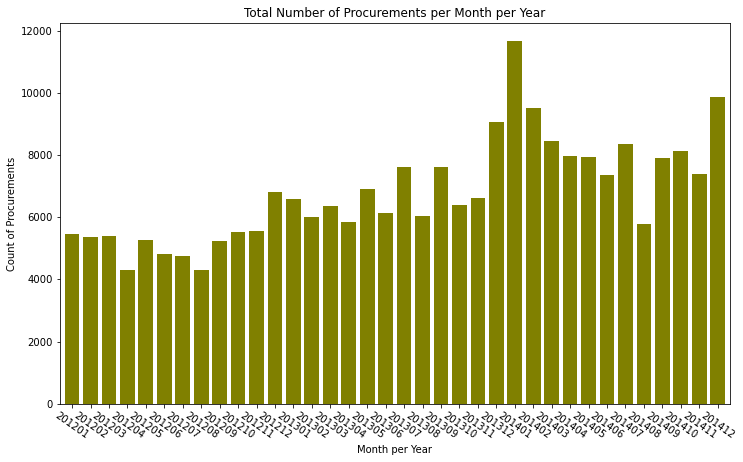

In [41]:
#visualize the above created series
plt.figure(figsize=(12,7))                                   #specify the size of the graph
month_per_year_plot=ser2.plot.bar(width=0.8,color='olive')   #specify data to plot, type of graph and colour while saving it in a variable

#specify the axis labels and title of plot
month_per_year_plot.set(xlabel='Month per Year',ylabel='Count of Procurements',title='Total Number of Procurements per Month per Year')

#rotate the labels of the x ticks to show them better
plt.xticks(rotation=-35)

plt.show()


3. What is the distribution of values? In other words, what is the proportion of procurements that have value X?  Can you build a visualization to highlight the what you found more interesting and discuss it? Note: Consider working with the Logarithm base 10 of values; Consider use predefined bin in the X values.

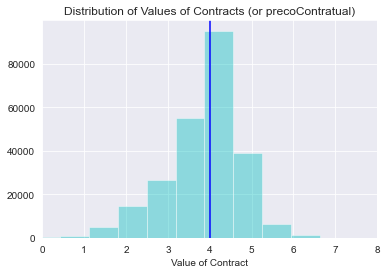

In [42]:
#Visualization:
sns.set_style('darkgrid')                     #specify style or theme of background of graph
plt.axvline(x=np.log10(10000),color='b')      #draws a vertical line at the midpoint of x-axis at contract value=10000 (most common value in distribution)
plt.xlim(0,8)                                 #specifies the range or limit of the x axis
plt.title('Distribution of Values of Contracts (or precoContratual)')              #specifies the title of the plot

#saves the data to plot which is the log 10 of the positive values of the precoContratual column into a variable
precodist=np.log10(list(filter(lambda x: x>0, value["precoContratual"].values)))   

#specifies the label of the x-axis by naming the series of log values created above
precodist=pd.Series(precodist,name='Value of Contract')

#specifies the type of plot, the data to plot, the number of bins, and the colour (keeps only the histogram not the line)
sns.distplot(precodist,kde=False,bins=15,hist=True,color='c')


<font color='darkblue'>
Note: this is the log10 of X for the x-axis.

The distribution is left or negatively skewed with the mode or most common value at 10000. Regarding proportion of procurements, almost 40% of the contracts have a value between 10000 and 50000 euros (95000contracts/244440contracts=38%).
</font> 

4. In the dataset, how many issuing Institutions are there? And how many suppliers?

In [43]:
#I checked using the NIFs and not the names because they are unique identifiers and since they are numbers only
#there is less room for error (no non alphanumeric characters)

#check how many issuing institutions are there by checking the number of unique values in the issuerNIF column
issuers = data['issuerNIF'].nunique()

#check how many suppliers are there by checking the number of unique values in the supplierNIF column
suppliers = data['supplierNIF'].nunique()

print('There are',issuers,'issuing institutions and',suppliers,'suppliers')

There are 5740 issuing institutions and 42517 suppliers


5. What services has ISEGI-Inst Superior de Estatistica e Gestão de Informação da UNL (NIF: 502322152) supplied? And who are the top three issuers/beneficiaries of such services?

In [44]:
#Services supplied by ISEGI: (meaning what is their CPV if their supplier NIF is 502322152)
#I assumed you want the code and description of servise which is why I am showing the cpvDOC and CPV

#create a dataframe (supp_services_data) which only contains the CPV (aka services) and the supplier codes (aka supplierNIF)
supp_services_data=data.filter(['cpvDOC','CPV','supplierNIF'])

#create a smaller dataframe from supp_services_data which only contains the rows with the supplier NIF equal to 502322152
ISEGI_supplier=supp_services_data.loc[(supp_services_data.supplierNIF == '502322152')]

#drop the duplicate data so that you don't list services repetitively
ISEGI_supplier=ISEGI_supplier.drop_duplicates()

#set the cpvDOC column as the index
ISEGI_supplier=ISEGI_supplier.set_index('cpvDOC')
ISEGI_supplier

,CPV,supplierNIF
cpvDOC,,
79320000-3,Serviços de sondagens de opinião,502322152
80000000-4,Serviços de ensino e formação,502322152
79313000-1,Serviços de avaliação dos resultados,502322152
72000000-5,"Serviços de TI: consultoria, desenvolvimento ...",502322152
79310000-0,Serviços de estudos de mercado,502322152
72212100-0,Serviços de desenvolvimento de software para ...,502322152


In [45]:
#Top three issuers/beneficiaries of such services:
#(I assumed you want the codes of these issuers rather than their names since that is the unique identifier, I also 
#assumed you mean top 3 as in count not value)

#create a tiny dataframe with only cpvDOC (unique identifier of CPV) and issuerNIF (unique identifier of issuers)
issu_cpv_data=data.filter(['cpvDOC','issuerNIF'])

#filter out from the above dataframe the rows that contain the cpvDOC ID codes of ISEGI services and put it in a new df
#(checks if value in cpvDOC column of issu_cpv_data is in the list of the indices from the ISEGI_supplier dataframe
ISEGI_beneficiaries=issu_cpv_data.loc[issu_cpv_data['cpvDOC'].isin(list(ISEGI_supplier.index))]
ISEGI_beneficiaries

#count the number of times each issuer shows up in the above dataframe (which only includes cpvDOC IDs/services from 
#the ISEGI supplier) then show the top 3 counts
ISEGI_beneficiaries.groupby('issuerNIF').count().nlargest(3,'cpvDOC')

,cpvDOC
issuerNIF,
509906478,607
501886354,563
502017368,141


6. What are the top five services (CPV) contracted by Hospital de Santa Maria Maior (NIF: 506361381)?

In [46]:
#Services contracted by Hospital de Santa Maria Maior: (meaning what is their CPV if their issuer NIF is 506361381)
#I assumed you want the description of the services for better visualization purposes which is why I am showing 
#only CPV description without the ID,I also assumed you mean top 5 as in count not value)

#create a dataframe (issu_services_data) which only contains the CPV (aka services) and the supplier codes (aka supplierNIF)
issu_services_data=data.filter(['CPV','issuerNIF'])

#create a smaller dataframe from issu_services_data which only contains the rows with the issuer NIF equal to 506361381
hospital_issuer=issu_services_data.loc[(issu_services_data.issuerNIF == '506361381')]

#group the services (aka group the values by their CPV) and then count the number of elements within each group (or CPV)
#then find the top 5 services or CPV with the largest count 
hospital_issuer.groupby('CPV').count().nlargest(5,'issuerNIF')

,issuerNIF
CPV,
Medicamentos usados na terapêutica endócrina,21
Medicamentos vários,21
Vestuário profissional,12
Medicamentos para o sangue e para os órgãos hematopoiéticos,10
Reagentes de laboratório,8


7. What services (CPV) has Novo Banco, S.A. (NIF: 513204016) supplied? Agregate the output by CPV and sort by descending order of total value.

In [47]:
#create a dataframe (supp_services_data2) which only contains the CPV, the supplierNIF, and the precoContratual (aka the value)
supp_services_data2=data.filter(['CPV','supplierNIF','precoContratual'])

#create a smaller dataframe from supp_services_data2 which only contains the rows with the supplier NIF equal to 513204016
novobanco_supp=supp_services_data2.loc[(supp_services_data2.supplierNIF == '513204016')]

#group by the service (aka CPV) and sum the prices of all contracts within each service, then sort the sum values in descneding order
novobanco_supp.groupby('CPV').sum().sort_values('precoContratual',ascending=False)

#Note: there are only 2 services and this is because of the data cleaning I performed earlier...I still did the groupby
#or aggregation and sorting to completely answer the question

,precoContratual
CPV,
Automóveis de passageiros,19918.7
Serviços das agências de cobrança,16372.8


8. Can you measure the correlation between the length/duration of contract ("Prazo de execução") and the final value ("Preço total efetivo")? Are longer contracts more costly?<br>
    8.1 What if you plot the average price per day as a function of the duration of the contract? What relationship to you obtain?

In [48]:
#calculates the pearson correlation between duration of contract and its price
float(data['prazoExecucao'].corr(data['precoContratual']))

#Being so close to 0, there is a very very weak positive correlation so the price of a contract is not really affected by 
#its duration

0.09370738455780588

<function matplotlib.pyplot.show(*args, **kw)>

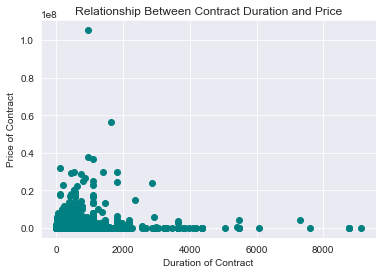

In [49]:
#Visualization of the above computed Pearson correlation for better analysis:

#plot a scatterplot with x as the number of days (or contract duration), and y as the contract price

#specify type of plot, columns to plot and colour of plot
plt.scatter(data['prazoExecucao'], data['precoContratual'],c='teal')

#specify the labels of the axis and the title of the plot
plt.xlabel('Duration of Contract')
plt.ylabel('Price of Contract')
plt.title('Relationship Between Contract Duration and Price')
plt.show

<font color='darkblue'>
The graph confirms the conclusion above...there is a very low and weak positive correlation. Additinally, most of the points seem to be concentrated in the lower prices and lower duration.
</font> 

In [50]:
#Question 8.1
#Answer following VERSION1
#My interpretation of this question was to get the average price per day meaning dividing the price of each contract
#with its duration to get the price per day of that specific contract...and thus I did my code and graph in this manner


#add a column to the dataset which calculates the average price per day by dividing the price of the contract by its duration
data['average_price']=data["precoContratual"]/data['prazoExecucao']

#calculates the pearson correlation between duration of contract and its average price
float(data['prazoExecucao'].corr(data['average_price']))

-0.0797887627191651

<function matplotlib.pyplot.show(*args, **kw)>

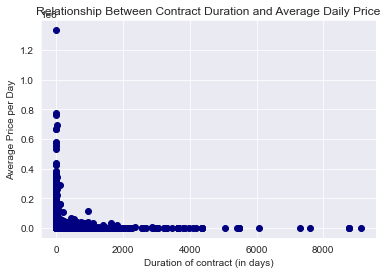

In [51]:
#Visualization of the above computed Pearson correlation for better analysis:

#plot a scatterplot with x as the number of days (or contract duration), and y as the average price

#specify type of plot, columns to plot and colour of plot
plt.scatter(data['prazoExecucao'],data['average_price'],c='navy')

#specify the labels of the axis and the title of the plot
plt.xlabel('Duration of contract (in days)')
plt.ylabel('Average Price per Day')
plt.title('Relationship Between Contract Duration and Average Daily Price')
plt.show

<font color='darkblue'>
Again, there seems to be almost no correlation. The pearson correlation is -0.08 which means a very very weak negative correlation.The graph also confirms that there is a negligible correlation.
</font> 

In [53]:
#Question 8.1
#Answer following VERSION 2 
#"The objective is to aggregate all contracts with a duration X, and then compute the average cost/value per day
#of such contracts. What relationship do you observe? Are longer contracts cheaper in a daily cost? Or more expensive?"

#My interpretation is to first group the contracts by their duration then average their prices out to get the 
#average cost (kind of like the cost of one contract). Following this, we should get the value per day by dividing the
#average cost with the number of days (aka duration of contract)..this way I have the daily cost or value per day

#Create a dataframe which groups the contracts by their duration then averages the prices of all the contracts within
#each duration group (reset the index to stop the prazoExecucao column from being an index which we can not manipulate)
duration_df= data.groupby(data['prazoExecucao']).agg('mean').reset_index()

#Add a column to the above created dataframe which contains the daily cost of a contract in each of the durations
#Do this by dividing the price column (which was aggregated by mean) with the number of days (aka duration column)
duration_df['valueperday']=duration_df['precoContratual']/duration_df['prazoExecucao']

#Show the top of the dataframe for better understanding and visualization
duration_df.head()

#Note: just rerun if you get error, the notebook glitches sometimes for no reason!

,prazoExecucao,idcontrato,precoContratual,average_price,valueperday
0,1,1.121841e+06,7723.544638,7723.544638,7723.544638
1,2,9.035357e+05,12166.240266,6083.120133,6083.120133
2,3,9.778957e+05,7334.601463,2444.867154,2444.867154
3,4,8.737384e+05,10058.216920,2514.554230,2514.554230
4,5,9.878923e+05,8125.913516,1625.182703,1625.182703


In [54]:
#compute the pearson correlation between the daily cost of contracts and their duration
duration_df['valueperday'].corr(duration_df['prazoExecucao'])

-0.02190976295416385

<function matplotlib.pyplot.show(*args, **kw)>

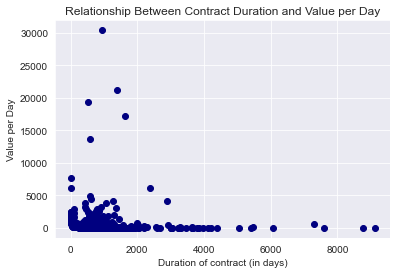

In [55]:
#Visualization of the above computed Pearson correlation for better analysis:

#plot a scatterplot with x as the number of days (or contract duration), and y as the daily cost (or value per day)

#specify type of plot, columns to plot and colour of plot
plt.scatter(duration_df['prazoExecucao'],duration_df['valueperday'],c='navy')

#specify the labels of the axis and the title of the plot
plt.xlabel('Duration of contract (in days)')
plt.ylabel('Value per Day')
plt.title('Relationship Between Contract Duration and Value per Day')
plt.show

<font color='darkblue'>
There seems to be a very weak negative correlation (-0.02) between the duration of the contract and its value per day.
So longer contracts are cheaper in terms of daily cost but not that much cheaper. Additionally, the duration is barely impacting the price, there are many other variables at play. Hence, the very weak and negligible correlation.
</font> 

<b>[Step 5. | 5 points ]</b> You probably have noticed that our dataset includes procurements issued by municipalities (Câmara Municipal or Município). Interesting huh?

Next, we will explore municipality procurement data a bit more in detail. To that end, we will need to process our procurement dataset, in order to obtain the procurements of each municipality, aggregate the data and obtain the relevant metrics.

However, the data is not uniform as some typos lead to the same municipality having different names. Moreover, there are municipal companies that have a different fiscal code than the municipalities. To make it simple, let us ignore municipal companies. Moreover, we have prepared beforehand a .csv file that lists all the NIF ids associated wit each municipality.

1. Download the file MunicipiosNIF.csv from https://tinyurl.com/y9kjrgqb and load it into a dataframe;

In [56]:
#load the excel file into the nif_municip dataframe
nif_municip= pd.read_excel('MunicipiosNIF.xlsx','Sheet1')

#typecast the NIF column from integer to string in order to be able to merge it in the next step
nif_municip['NIF']=nif_municip['NIF'].astype(str)

#check that the type of the NIF column has successfully converted to string
nif_municip['NIF'].dtypes

#Note: I checked if there are duplicates in this dataset by checking shape first to include 308 rows then using
#drop_duplicates() on the NIF column and checking the shape of the dataframe again which remained at 308 rows

dtype('O')

2. Create a new dataframe that contains only the procurements issued by municipalities. Use the dataframe created above to aid your filtering.

Note: you will end up with situations where the same municipality will have different names, although it has the same NIF. Consider using only the NIF as the unique identifier of a municipality, and if there are multiple names associated to it, to choose one. Explain how did you proceed.

In [57]:
#create a new dataframe by merging data and nif_municip dataframes, this is an inner join because we only want to keep
#values that exist in both dataframes...meaning only the procurements issued by municipalities (no companies included)
municip_issuer_df=pd.merge(data,nif_municip,how='inner',left_on='issuerNIF',right_on='NIF')

#now drop the NIF column because it's exactly the same as the issuerNIF column
municip_issuer_df=municip_issuer_df.drop('NIF',1)

#remove all duplicates (in case)
municip_issuer_df.drop_duplicates(inplace=True)

#since issuerName has municipalities with different names associated, I decided to only keep the name given in the 
#Municipality column of the nif_municip dataframe (since it does not have duplicates which we confirmed in the previous cell)
#...to do this, I made the values of the issuerName column now equal to the values of the Municipality in the newly merged dataframe
municip_issuer_df['issuerName']=municip_issuer_df['Municipality']

#now drop the Municipality column because it's exactly the same as the issuerName column
municip_issuer_df=municip_issuer_df.drop('Municipality',1)

#do a quick check on the dataframe by returning the first 5 rows
municip_issuer_df.head()

,idcontrato,tipoContrato,tipoprocedimento,objectoContrato,adjudicantes,adjudicatarios,dataPublicacao,dataCelebracaoContrato,precoContratual,cpv,prazoExecucao,localExecucao,fundamentacao,cpvDOC,CPV,issuerNIF,issuerName,supplierNIF,supplierName,average_price
0,845377,Empreitadas de obras públicas,Concurso público,AMBIENTE EM MATOSINHOS – CASA MORTUÁRIA DE LAVRA,501305912 - Município de Matosinhos,"500687030 - Valentim José Luís &amp; Filhos, S.A.",2013-10-03,2013-08-05,297423.55,45214200-2 - Construção de edifícios escolares,240,"Portugal, Porto, Matosinhos","Artigo 19.º, alínea b) do Código dos Contratos...",45214200-2,Construção de edifícios escolares,501305912,Município de Matosinhos,500687030,"- Valentim José Luís &amp; Filhos, S.A.",1239.264792
1,1297789,Empreitadas de obras públicas,Concurso público,Parque das Austrálias - Contrato n.º 5/2013,501305912 - Município de Matosinhos,"507488806 - NBO - Engenharia e Ambiente, S.A",2014-11-12,2013-01-29,292301.37,45112711-2 - Trabalhos de paisagismo em parques,90,"Portugal, Porto, Matosinhos","Artigo 19.º, alínea b) do Código dos Contratos...",45112711-2,Trabalhos de paisagismo em parques,501305912,Município de Matosinhos,507488806,"- NBO - Engenharia e Ambiente, S.A",3247.793000
2,801380,Empreitadas de obras públicas,Concurso público,ESPAÇO QUADRA - INOVAÇÃO E CRIATIVIDADE,501305912 - Município de Matosinhos,503590010 - QTCIVIL - ENGENHARIA E REABILITAÇÃ...,2013-07-25,2013-07-04,274702.31,45400000-1 - Obras de acabamento de edifícios,120,"Portugal, Porto, Matosinhos","Artigo 19.º, alínea b) do Código dos Contratos...",45400000-1,Obras de acabamento de edifícios,501305912,Município de Matosinhos,503590010,"- QTCIVIL - ENGENHARIA E REABILITAÇÃO, S.A.",2289.185917
3,790849,Empreitadas de obras públicas,Concurso público,ESTAR PERTO DAS PESSOAS: HABITAÇÃO SOCIAL - CO...,501305912 - Município de Matosinhos,504125567 - PEDRIFIEL – Sociedade de Exploraçã...,2013-07-09,2013-07-02,179903.20,45110000-1 - Demolição e destruição de edifíci...,210,"Portugal, Porto, Matosinhos","Artigo 19.º, alínea b) do Código dos Contratos...",45110000-1,Demolição e destruição de edifícios e movimen...,501305912,Município de Matosinhos,504125567,- PEDRIFIEL – Sociedade de Exploração de Grani...,856.681905
4,1011545,Aquisição de serviços | Empreitadas de obras p...,Concurso público,Valorizar as pessoas: educação – EB1/JI da Igr...,501305912 - Município de Matosinhos,"501314920 - Cunha &amp; Barroso, Lda",2014-03-19,2013-11-04,1562194.41,45214200-2 - Construção de edifícios escolares...,365,"Portugal, Porto, Matosinhos","Artigo 19.º, alínea b) do Código dos Contratos...",45214200-2,Construção de edifícios escolares | 507000002...,501305912,Município de Matosinhos,501314920,"- Cunha &amp; Barroso, Lda",4279.984685


3. What are the top ten suppliers in terms of value to the municipality of Lisbon?

In [58]:
#I assumed you want the names and codes of the suppliers...

#get the NIF value of municipality of Lisbon 
lisbon_nif=nif_municip.loc[nif_municip['Municipality'].str.contains('Lisboa')]
print(lisbon_nif)

#create a dataframe (municip_issuer_df2) which only contains the columns listed in brackets below
municip_issuer_df2=municip_issuer_df.filter(['issuerNIF','issuerName','supplierNIF','supplierName','precoContratual','CPV'])

#create a smaller dataframe from municip_issuer_df2 that filters out only the municipality of Lisbon (so only contains
#the rows with the issuerNIF equal to 500051070 which is that of Lisbon municipality)
lisbon_mun=municip_issuer_df2.loc[municip_issuer_df['issuerNIF']=='500051070']

#group the suppliers in this dataframe and sum their value (by summing the prices of all their associated contracts)
#then find the top 10 suppliers with the largest sum (aka value)
lisbon_mun.groupby(['supplierNIF','supplierName']).sum().nlargest(10,'precoContratual')


         NIF         Municipality
2  500051070  Município de Lisboa


,,precoContratual
supplierNIF,supplierName,
500243719,"- Securitas - Serviços e Tecnologia de Segurança, S.A.",7073688.48
502220821,"- Habitamega Construções, S.A.",7043241.58
502629428,"- Euromex, Lda.",6323077.34
503504564,"- EDP Comercial, SA",5823386.23
503864960,"- Teixera, Pinto &amp; Soares, S.A.",4446533.16
502185155,"- CONSTRUTORA UDRA, LDA.",4442348.00
501323325,- Uniself Sociedade de Restaurantes Públicos e Privados SA,4408763.64
502544180,"- VODAFONE PORTUGAL - Comunicações Pessoais, S.A.",4172563.59
502828110,"- Controp-Congevia,SA",4137710.86


4. What are the top ten services in terms of value supplied to Lisbon?

In [59]:
#I assumed you want only the description of the services for better visualization purposes which is why I am showing 
#only CPV description without the ID...

#group by the service (aka CPV) and sum the prices of all contracts within each service,then find the top 10 services
#with the largest sum (aka value)
lisbon_mun.groupby(['CPV']).sum().nlargest(10,'precoContratual')

,precoContratual
CPV,
Construção de edifícios destinados à educação ou à investigação,14856384.77
Outros serviços,13960549.01
Construção,10531445.24
Serviços de limpeza,10471798.04
Serviços de vigilância,8109278.67
Trabalhos de paisagismo,7034760.35
Construção de edifícios multifuncionais,6578226.59
Construção de instalações para ocupação de tempos livres,5530271.15
Obras de recuperação,5459605.04


5. Compute the average value of the procurements (only those contracted by municipalities) per supplier. Show as ab histogram the number of companies that received a total amount X from municipalities. Identify the top 10 companies that received more money from municipalities.

In [60]:
#I assumed you want both the codes and names of the suppliers..

#average value of the procurements (only those contracted by municipalities) per supplier.
#(only those contracted by municipalities) means using the original municip_issuer_df
#we groupby the suppliers and compute the mean price of all contracts associated with each supplier
municip_issuer_df.groupby(['supplierNIF','supplierName']).precoContratual.mean()

supplierNIF     supplierName                      
003596308B01    - WORLD PRESS PHOTO FOUNDATION        15375.00
02547420303     - GEM-MATTHEWS INTERNATIONAL SRL      27000.00
0432536163      - Última Vez VZW                       7626.40
06371710630     - Tecnobus, S.p.a.                     7424.15
06966442H       - Juan Angel, Sonido e Iluminacion    14750.00
                                                        ...   
G47478920       - ASOCIACION CULTURAL TRADIBERICA     10000.00
G91665232       - FUNDACION MUSEO ATRAZANAS            8700.00
GB32793115      - Guiness World Records                8500.00
NL821174393     - Leaders 2BE BV                      49000.00
NL821811939B01  - ReadSpeaker B.V.                     4140.00
Name: precoContratual, Length: 17115, dtype: float64

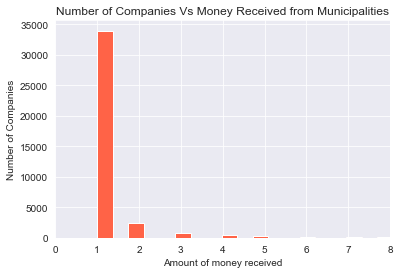

In [61]:
#the Histogram

#My interpretation of the question is to do groups of the different prices, and for each price group count the number 
#of suppliers in order to see how many companies received how much from municipalities..

#plot a histogram with x as the amount of money received, and y as the number of companies receiving that money

#specify the data to plot in the histogram, its number of bins and colour
plt.hist(municip_issuer_df.groupby(['precoContratual']).supplierNIF.count(),bins=1000,color='tomato')

#specify the title of the plot and the labels of the axis
plt.title('Number of Companies Vs Money Received from Municipalities')
plt.xlabel('Amount of money received')
plt.ylabel('Number of Companies')

#specify the range or limit of the x ticks
plt.xlim(0,8)
plt.show()

In [62]:
#the top 10 companies that received more money from municipalities 
#(I assumed you want the companies by their NIF code and name)

#sum value of the procurements (only those contracted by municipalities) per supplier then sort them in descending order
#and show the top 10
municip_issuer_df.groupby(['supplierNIF','supplierName'])['precoContratual'].sum().sort_values(ascending=False).head(10)

supplierNIF  supplierName                                                                 
503504564    - EDP Comercial, SA                                                              1.384063e+08
500697370    - Galp Energia, SA.                                                              6.274617e+07
501323325    - Uniself Sociedade de Restaurantes Públicos e Privados SA                       4.563211e+07
500126623    - GERTAL - Companhia Geral de Restaurantes e Alimentação, S.A.                   4.060677e+07
502877472    - ECOAMBIENTE, Consultores de Engenharia, Gestão e Prestação de Serviços, Lda    2.878159e+07
504075497    - CIP Construção, S.A.                                                           2.554026e+07
500347506    - EUREST (PORTUGAL) - Sociedade Europeia de Restaurantes,lda.                    2.505790e+07
501489126    - Domingos da Silva Teixeira, S.A.                                               2.406987e+07
500246963    - Repsol Portuguesa, S.A:               

6. What is the most common "tipo de procedimento" of procurements issued by municipalities? <br>
    6.1 What if you consider only procurements with a value above 50 000 euros? <br>
    6.2 How do you relate these results with those obtained in Step 5 question 3?

In [63]:
#Question 6

#count the number of elements in each of the different values of the tipoprocedimento column
print(municip_issuer_df['tipoprocedimento'].value_counts())

print('The most common "tipo de procedimento" of procurements issued by municipalities is Ajuste Direto Regime Geral')

Ajuste Direto Regime Geral                   55246
Concurso público                              5480
Ao abrigo de acordo-quadro (art.º 258.º)       378
Ao abrigo de acordo-quadro (art.º 259.º)       314
Concurso limitado por prévia qualificação       41
Name: tipoprocedimento, dtype: int64
The most common "tipo de procedimento" of procurements issued by municipalities is Ajuste Direto Regime Geral


In [64]:
#Question 6.1

#create a new dataframe that only includes procurements issued by municipalities with a value above 50 000 euros
proc_50k=municip_issuer_df.loc[municip_issuer_df['precoContratual']>50000]

#count the number of elements in each of the different values of the tipoprocedimento column in this new dataframe
print(proc_50k['tipoprocedimento'].value_counts())

print('When considering only procurements issued by municipalities with a value above 50 000 euros, the most common "tipo de procedimento" is still Ajuste Direto Regime Geral')

Ajuste Direto Regime Geral                   7907
Concurso público                             3863
Ao abrigo de acordo-quadro (art.º 258.º)      140
Ao abrigo de acordo-quadro (art.º 259.º)      107
Concurso limitado por prévia qualificação      32
Name: tipoprocedimento, dtype: int64
When considering only procurements issued by municipalities with a value above 50 000 euros, the most common "tipo de procedimento" is still Ajuste Direto Regime Geral


In [65]:
#Question 6.2
#VERSION 1

#use the groupby from Step 5 number 3 and turn it into a series with the top suppliers and their NIFs as the index
topsupp_series=lisbon_mun.groupby('supplierNIF').agg('sum').nlargest(10,'precoContratual')

#filter out from the municipality dataframe the rows that contain the NIF codes of our top 10 suppliers and put it in a new df
#(checks if value in supplierNIF column of municip_issuer_df is in the list of the indices from the top10 suppliers series)
topsupp_df=municip_issuer_df.loc[municip_issuer_df['supplierNIF'].isin(list(topsupp_series.index))]

#count the number of elements in each of the different values of the tipoprocedimento column in this new dataframe
topsupp_df['tipoprocedimento'].value_counts()

#Note if you get an error that 'lisbon_mun' is not defined please rerun step 5 question 3 which defines lisbon_mun 
#(sometimes the notebook decides to glitch randomly for no reason...again)

Ajuste Direto Regime Geral                  518
Concurso público                            249
Ao abrigo de acordo-quadro (art.º 258.º)     54
Ao abrigo de acordo-quadro (art.º 259.º)     23
Name: tipoprocedimento, dtype: int64

<font color='darkblue'>
I notice that the top ten suppliers to Lisbon also mostly follow Ajuste Direto Regime Geral type of procedures. We dont see any changes in the tipoprocidemento...So just like it's the most popular procedure amongst all municipalities as well as among expensive contracts (worth >50000 euros), it is also the most common in Lisbon.

With all municipalities, Ajuste is the most common.
With only the municipality of Lisbon, Ajuste is still the most common.
</font> 

In [66]:
#VERSION 2
data['tipoprocedimento'].value_counts()

Ajuste Direto Regime Geral                   217531
Concurso público                              15458
Ao abrigo de acordo-quadro (art.º 259.º)       7150
Ao abrigo de acordo-quadro (art.º 258.º)       3983
Concurso limitado por prévia qualificação       308
Procedimento de negociação                       10
Name: tipoprocedimento, dtype: int64

<font color='darkblue'>
If I were to answer this question based on VERSION 2 which asks us to relate to Step 4 Question 3...

Ajuste Direto Regime Geral is the most common tipoprocidemento for contracts with a price higher than 50000 euros. Thus, we can see that the 7907 Ajuste tipoprocidemento contracts which we found across all municipalities in Question 6.1 are in this group of 40000 contracts or right side of our histogram created in Step 4 Question 3 
(starting from between x=4 and 5).

Additionally, when looking at Step 4 Question 3, we are using the old dataset with all the potential institutions
while in this question we are only looking at the municipalities but the result is the same. Ajuste Direto is the most common in both datasets meaning that its very popular.

With all institutions, Ajuste is the most common.
With only the municipalities, Ajuste is still the most common.
</font>

<b>[Step 6. | 4 points ]</b> Next, and in the spirit of a vast scientific literature on Urban Scaling Laws (https://tinyurl.com/y8ohmzx7), let us investigate the relationship between the number and value of procurements issued by municipalities and their population size.

To that end we will need to download and load an additional dataset that includes the population size of each municipality. You can find the population data in the following link https://tinyurl.com/y9snl933. <br>
This dataset was obtained from the portal pordata. As is the case in many data science projects we don't have a perfect matching key between the population data and the procurement data we have been working so far. 

1. Download the file popsize.csv from https://tinyurl.com/y9snl933 and load it to a dataframe. Explore the dataframe and explain how can you link this data to the procurement data.

In [67]:
#load the csv file into popsize_df and be careful to state the separator or delimiter as ';'
popsize_df=pd.read_csv('popsize.csv',delimiter=';')

#check by seeing the top of the df
popsize_df.head()

,Location,Population
0,Arcos de Valdevez,22 284
1,Caminha,16 465
2,Melgaço,8 874
3,Monção,18 931
4,Paredes de Coura,9 039


In [68]:
#check how many recors or rows the dataframe has
popsize_df.shape

(308, 2)

In [69]:
#check the number of unique values in the Location column
popsize_df['Location'].nunique() 

#since it's the same as the number of rows, that means there are no duplicates

308

In [70]:
#reminder of the other dataframes I have and can be handy to merge together
nif_municip.head()

,NIF,Municipality
0,500051054,Município de Almada
1,500051062,Município de Sintra
2,500051070,Município de Lisboa
3,500745773,Município de Alcanena
4,500745943,Município de Oeiras


In [71]:
#reminder of the other dataframes I have and can be handy to merge together
municip_issuer_df.head()

,idcontrato,tipoContrato,tipoprocedimento,objectoContrato,adjudicantes,adjudicatarios,dataPublicacao,dataCelebracaoContrato,precoContratual,cpv,prazoExecucao,localExecucao,fundamentacao,cpvDOC,CPV,issuerNIF,issuerName,supplierNIF,supplierName,average_price
0,845377,Empreitadas de obras públicas,Concurso público,AMBIENTE EM MATOSINHOS – CASA MORTUÁRIA DE LAVRA,501305912 - Município de Matosinhos,"500687030 - Valentim José Luís &amp; Filhos, S.A.",2013-10-03,2013-08-05,297423.55,45214200-2 - Construção de edifícios escolares,240,"Portugal, Porto, Matosinhos","Artigo 19.º, alínea b) do Código dos Contratos...",45214200-2,Construção de edifícios escolares,501305912,Município de Matosinhos,500687030,"- Valentim José Luís &amp; Filhos, S.A.",1239.264792
1,1297789,Empreitadas de obras públicas,Concurso público,Parque das Austrálias - Contrato n.º 5/2013,501305912 - Município de Matosinhos,"507488806 - NBO - Engenharia e Ambiente, S.A",2014-11-12,2013-01-29,292301.37,45112711-2 - Trabalhos de paisagismo em parques,90,"Portugal, Porto, Matosinhos","Artigo 19.º, alínea b) do Código dos Contratos...",45112711-2,Trabalhos de paisagismo em parques,501305912,Município de Matosinhos,507488806,"- NBO - Engenharia e Ambiente, S.A",3247.793000
2,801380,Empreitadas de obras públicas,Concurso público,ESPAÇO QUADRA - INOVAÇÃO E CRIATIVIDADE,501305912 - Município de Matosinhos,503590010 - QTCIVIL - ENGENHARIA E REABILITAÇÃ...,2013-07-25,2013-07-04,274702.31,45400000-1 - Obras de acabamento de edifícios,120,"Portugal, Porto, Matosinhos","Artigo 19.º, alínea b) do Código dos Contratos...",45400000-1,Obras de acabamento de edifícios,501305912,Município de Matosinhos,503590010,"- QTCIVIL - ENGENHARIA E REABILITAÇÃO, S.A.",2289.185917
3,790849,Empreitadas de obras públicas,Concurso público,ESTAR PERTO DAS PESSOAS: HABITAÇÃO SOCIAL - CO...,501305912 - Município de Matosinhos,504125567 - PEDRIFIEL – Sociedade de Exploraçã...,2013-07-09,2013-07-02,179903.20,45110000-1 - Demolição e destruição de edifíci...,210,"Portugal, Porto, Matosinhos","Artigo 19.º, alínea b) do Código dos Contratos...",45110000-1,Demolição e destruição de edifícios e movimen...,501305912,Município de Matosinhos,504125567,- PEDRIFIEL – Sociedade de Exploração de Grani...,856.681905
4,1011545,Aquisição de serviços | Empreitadas de obras p...,Concurso público,Valorizar as pessoas: educação – EB1/JI da Igr...,501305912 - Município de Matosinhos,"501314920 - Cunha &amp; Barroso, Lda",2014-03-19,2013-11-04,1562194.41,45214200-2 - Construção de edifícios escolares...,365,"Portugal, Porto, Matosinhos","Artigo 19.º, alínea b) do Código dos Contratos...",45214200-2,Construção de edifícios escolares | 507000002...,501305912,Município de Matosinhos,501314920,"- Cunha &amp; Barroso, Lda",4279.984685


Explanation:

<font color='darkblue'>
Option 1:
The population dataframe (popsize_df) has a Location column which has words that are contained in the municipality dtaframe (nif_municip) in the Municipality column. Thus, I can split the Municipality column entries into words and then remove the "Municipio de,da,do,das.." so as to match it to the Location column in the population dataframe as much as possible. I would put this in a new column called Location and add it to the Municipality dataframe.

I would then merge the population dataframe with the municipality dataframe on the Location columns which should be identical or almost identical now. Then I can merge this dataframe with the bigger procurements dataframe (data or even better the filtered one municip_issuer_df) on the NIF columns. That way I connected the location (from population) to the municipality to the NIF (in procurements)

In short, I would link the Location column (from population) to the Municipality column (from municipality) and then to the issuerNIF column (from procurements data). 
</font>

2. Create a new dataframe in which contracts are aggregated by municipality. You should have a dataframe in which the columns correspond to: NIF; Municipality Name; Population Size; Number of Issued Procurements; Total Value of Issued Procurements. Note you will have to merge at least two dataframes, and apply several aggregations.

<font color='darkblue'>
I realize that our procurements data is for the 3 years of 2012,2013, and 2014....but I'm not sure about the population data...we don't have information about which years it considers but we will have to work with what we have...

Thus, assuming that the population per municipality is the same over the years of 2012-2014, I will perform the merge 
in the following way...
</font> 

In [73]:
#1.0 create a list which takes the Municipality column and removes 'Município de'

issuerloc=list(nif_municip['Municipality'])
splitlist=[]
for line in issuerloc:
    a=line.replace('Município de ','')
    splitlist.append(a)

In [74]:
#1.1 amend that list to also remove 'Município da'
splitlist2=[]
for line in splitlist:
    b=line.replace('Município da ','')
    splitlist2.append(b)

In [75]:
#1.2 amend that list to also remove 'Município das'
splitlist3=[]
for line in splitlist2:
    c=line.replace('Município das ','')
    splitlist3.append(c)

In [76]:
#1.3 amend that list to also remove 'Município do'
splitlist4=[]
for line in splitlist3:
    d=line.replace('Município do ','')
    splitlist4.append(d)

In [77]:
#2. take the nif_municip dataframe and add a new column called Location filled with the list created above
nif_municip['Location']=splitlist4
nif_municip.tail()

,NIF,Municipality,Location
303,512074410,Município de Lagoa - Açores,Lagoa - Açores
304,512074771,Município de São Roque do Pico,São Roque do Pico
305,512074836,Município de Lajes das Flores,Lajes das Flores
306,512075506,Município das Velas,Velas
307,512079110,Município de Santa Cruz das Flores,Santa Cruz das Flores


In [78]:
#merge the municipality dataframe with the population one on the Location column
merged1=nif_municip.merge(popsize_df,how='inner',on='Location')
merged1

#notice we only have 301 rows which means 7 values are missing which is 2% of our data (7/308)

,NIF,Municipality,Location,Population
0,500051054,Município de Almada,Almada,171 481
1,500051062,Município de Sintra,Sintra,379 860
2,500051070,Município de Lisboa,Lisboa,520 549
3,500745773,Município de Alcanena,Alcanena,13 490
4,500745943,Município de Oeiras,Oeiras,172 689
...,...,...,...,...
296,512074143,Município das Lajes do Pico,Lajes do Pico,4 701
297,512074771,Município de São Roque do Pico,São Roque do Pico,3 371
298,512074836,Município de Lajes das Flores,Lajes das Flores,1 527
299,512075506,Município das Velas,Velas,5 347


In [79]:
#The result is only 301 rows out of 308...the following are the 7 missing values which we will need to manually
#insert into our data because we don't want to lose 2% of our data when it's an easy non-time consuming fix, and will
#affect our analysis 

popsize_df[~popsize_df['Location'].isin(splitlist4)]

,Location,Population
131,Castanheira de Pêra,2 983
157,Vila Velha de Ródão,3 407
228,Coruche,19 357
279,Lagoa [R.A.A.],14 636
286,Vila da Praia da Vitória,21 532
288,Calheta [R.A.A.],3 505
297,Calheta [R.A.M.],11 334


In [80]:
#rename all the missing values in the population dataframe to match those in the municipality dataframe so we can merge them too
popsize_df['Location']=popsize_df['Location'].str.replace('Castanheira de Pêra','Castanheira de Pera')
popsize_df['Location']=popsize_df['Location'].str.replace('Vila Velha de Ródão','Vila Velha de Rádío')
popsize_df['Location']=popsize_df['Location'].str.replace('Coruche','Coruche – Câmara Municipal')
popsize_df['Location']=popsize_df['Location'].str.replace('Lagoa \[R.A.A.\]','Lagoa - Açores')
popsize_df['Location']=popsize_df['Location'].str.replace('Vila da Praia da Vitória','Praia da Vitória')
popsize_df['Location']=popsize_df['Location'].str.replace('Calheta \[R.A.A.\]','Calheta São Jorge')
popsize_df['Location']=popsize_df['Location'].str.replace('Calheta \[R.A.M.\]','Calheta')


In [81]:
#Do the merge again and check to have 308 rows
merged1=nif_municip.merge(popsize_df,how='inner',on='Location')
merged1

,NIF,Municipality,Location,Population
0,500051054,Município de Almada,Almada,171 481
1,500051062,Município de Sintra,Sintra,379 860
2,500051070,Município de Lisboa,Lisboa,520 549
3,500745773,Município de Alcanena,Alcanena,13 490
4,500745943,Município de Oeiras,Oeiras,172 689
...,...,...,...,...
303,512074410,Município de Lagoa - Açores,Lagoa - Açores,14 636
304,512074771,Município de São Roque do Pico,São Roque do Pico,3 371
305,512074836,Município de Lajes das Flores,Lajes das Flores,1 527
306,512075506,Município das Velas,Velas,5 347


In [82]:
#compute the total value of issued procurements by doing a group by NIF on the big dataframe (municip_issuer_df) and 
#aggregating by sum...store the resulting series in the variable totval
totval=municip_issuer_df.groupby('issuerNIF')['precoContratual'].sum()
totval

issuerNIF
500051054    2.793470e+07
500051062    6.032375e+07
500051070    2.016346e+08
500745773    2.750230e+06
500745943    6.252282e+07
                 ...     
512074410    2.233646e+06
512074771    1.839125e+06
512074836    4.843389e+06
512075506    2.369482e+06
512079110    1.858503e+06
Name: precoContratual, Length: 308, dtype: float64

In [83]:
#compute the total number of issued procurements by doing a group by NIF on the big dataframe (municip_issuer_df) and 
#aggregating by count...store the resulting series in the variable numproc
numproc=municip_issuer_df.groupby('issuerNIF')['precoContratual'].count()
numproc

issuerNIF
500051054     724
500051062     715
500051070    2866
500745773      67
500745943    1075
             ... 
512074410     116
512074771      39
512074836      20
512075506      29
512079110      26
Name: precoContratual, Length: 308, dtype: int64

In [84]:
#concat the 2 series created above to form a dataframe called dfextra (this is possible because both series have the 
#same index which is issuerNIF), axis 1 means concatenating along the columns
dfextra=pd.concat([totval,numproc],axis=1)
#note: the resulting dfextra dataframe has now 2 columns called precoContratual which we will drop later

#add a column named Total Value of Issued Procurements to the dfextra dataframe with the same values as the totval series
dfextra['Total Value of Issued Procurements']=totval

#add a column named Number of Issued Procurements to the dfextra dataframe with the same values as the numproc series
dfextra['Number of Issued Procurements']=numproc

#drop the unnecessary precoContratual columns as we replaced them with the above added columns which have proper names
dfextra=dfextra.drop('precoContratual',axis=1)

In [85]:
#create a second df which joins merged1 with the above dfextra on the NIF columns, this is to add those additional
#columns to our final dataframe which we will use troughout step 6

merged2=pd.merge(merged1,dfextra,how='inner',left_on='NIF',right_on='issuerNIF')

#rename the columns to match the names specified in the question
merged2.rename(columns={'Location':'Municipality Name','Population':'Population Size'}, inplace=True)

#drop the Municipality column since it's repetitive compared to the Location (or now Municipality Name) column
merged2.drop('Municipality',axis=1,inplace=True)

#change the type of the population column by typecasting it into an integer, but first remove any spaces in the string
#e.g. string'171 481' will be integer 171481....this will be handy in the following questions
merged2['Population Size'] = merged2['Population Size'].str.replace(' ','').astype(int)

#show our dataframe with its appropriate column names and 308 rows
merged2

,NIF,Municipality Name,Population Size,Total Value of Issued Procurements,Number of Issued Procurements
0,500051054,Almada,171481,2.793470e+07,724
1,500051062,Sintra,379860,6.032375e+07,715
2,500051070,Lisboa,520549,2.016346e+08,2866
3,500745773,Alcanena,13490,2.750230e+06,67
4,500745943,Oeiras,172689,6.252282e+07,1075
...,...,...,...,...,...
303,512074410,Lagoa - Açores,14636,2.233646e+06,116
304,512074771,São Roque do Pico,3371,1.839125e+06,39
305,512074836,Lajes das Flores,1527,4.843389e+06,20
306,512075506,Velas,5347,2.369482e+06,29


3. It is common to compare not the absolute values of the different dimensions but their Logarithm. In that sense, create three new columns in your dataframe that correspond to the Logarithm base 10 of the Total Value of Issue Procurements; Number of Issued Procurements; and Population Size.

In [86]:
#add a column with the Logarithm base 10 of the Total Value of Issued Procurements
merged2['totval_log10'] = np.log10(merged2['Total Value of Issued Procurements']) 

#add a column with the Logarithm base 10 of the Total Number of Issued Procurements
merged2['numproc_log10'] = np.log10(merged2['Number of Issued Procurements']) 

#add a column with the Logarithm base 10 of the Population Size
merged2['popsize_log10'] = np.log10(merged2['Population Size']) 

#show the top of the dataframe to check the addition of the columns
merged2.head()

,NIF,Municipality Name,Population Size,Total Value of Issued Procurements,Number of Issued Procurements,totval_log10,numproc_log10,popsize_log10
0,500051054,Almada,171481,2.793470e+07,724,7.446144,2.859739,5.234216
1,500051062,Sintra,379860,6.032375e+07,715,7.780488,2.854306,5.579624
2,500051070,Lisboa,520549,2.016346e+08,2866,8.304565,3.457276,5.716462
3,500745773,Alcanena,13490,2.750230e+06,67,6.439369,1.826075,4.130012
4,500745943,Oeiras,172689,6.252282e+07,1075,7.796039,3.031408,5.237265


4. Compute the pearson correlation between the the Logarithms of the Population Size of each municipality with the Total Value of Issued Procurements and the Total Value of Issued Procurements. Make a scatter plot for each relationship to assess the identified relationship.

In [87]:
#correlation between Log of the Population Size and Log of Total Number of Issued Procurements as well as Log of Total
#Value of Issued Procurements (as per correction in VERSION 2)

merged2[['numproc_log10','totval_log10']].corrwith(merged2['popsize_log10'])

#for both, pearson correlation coefficient is around 0.7 which means there is a strong positive correlation. Total 
#value has a higher coefficient which means an even stronger correlation with population than the number of procurements does.

numproc_log10    0.696348
totval_log10     0.763265
dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

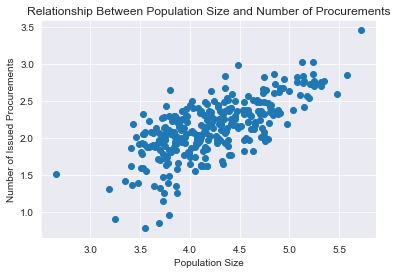

In [88]:
#plot a scatterplot with x as the (log10) population size, and y as the (log10) total number of issued procurements

#specify the type of plot and the columns to plot
plt.scatter(merged2['popsize_log10'],merged2['numproc_log10'])

#specify the axis labels and the title
plt.xlabel('Population Size')
plt.ylabel('Number of Issued Procurements')
plt.title('Relationship Between Population Size and Number of Procurements')

plt.show

#The graph matches the pearson correlation computed above which helps us conclude that there is a strong positive 
#correlation between the population size and the total number of issued procurements...so as the population size 
#increases, the number of issued procurements also increases. Number of procurements has an weaker correlation 
#(lower pearson value) with population than the total value of procurements does. This means that the population size 
#has a lower impact on the number of procurements than it does on the value of procurements.

<function matplotlib.pyplot.show(*args, **kw)>

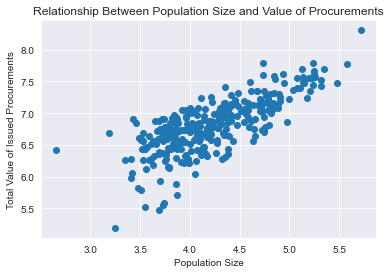

In [89]:
#plot a scatterplot with x as the (log10) population size, and y as the (log10) total value of issued procurements

#specify the type of plot and the columns to plot
plt.scatter(merged2['popsize_log10'],merged2['totval_log10'])

#specify the axis labels and the title
plt.xlabel('Population Size')
plt.ylabel('Total Value of Issued Procurements')
plt.title('Relationship Between Population Size and Value of Procurements')

plt.show

#The graph matches the pearson correlation computed above which helps us conclude that there is a strong positive 
#correlation between the population size and the total value of issued procurements...so as the population size 
#increases, the value/price of issued procurements also increases. Total value has an even stronger correlation
#with population than the number of procurements does. This means that the population size has a stronger impact on 
#the value of procurements than it does on the number of procurements.

5. Can you build a linear model using the library Statsmodel that regresses the Logarithms of the Total Value of issued procurements as a funcion of the population size? What is the coefficient that you find? <br>
**Tip:** You might to to look for some inspiration in the final part of Lab 7

In [90]:
#My interpretation: y as a function of x...y=(log10)total value of issued procurement...x=(log10)population size

#import the necessary libraries
import statsmodels.api as sm

#create a linear regression model with logarithm of the Total Value of Issued Procurements as the dependent variable Y
#and logarithm of the population size as the dependent variable X
intercept=sm.add_constant(merged2.popsize_log10)            #add an intercept as the stats model does not add this automatically
model = sm.OLS(merged2.totval_log10, intercept)

#Since the purpose of this question is not to predict anything and only to check the relationship between the variables
#I did not do a train-test-split

#fit the model
results = model.fit()

#print its parameters or the coefficient
print(results.params)

#print the summary
print(results.summary())


#The coefficient I get from this model is 0.6674 (when the intercept or constant is 3.9891)

const            3.989094
popsize_log10    0.667365
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           totval_log10   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     427.1
Date:                Sun, 01 Nov 2020   Prob (F-statistic):           5.29e-60
Time:                        12:41:40   Log-Likelihood:                -46.030
No. Observations:                 308   AIC:                             96.06
Df Residuals:                     306   BIC:                             103.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

6. What if instead of the Total Value of issued procurments you had the Value per capita (per capita means per person in the local population)? How would that impact the results in points 5.4 and 5.5?<br>


In [91]:
#My interpretation of the question is that you want the Value per Capita as a logarithm as well. As a result, I 
#calculated it by dividing total value of procurements with population first then finding the log of the value per capita

#find the value per capita
merged2['valpercap']= merged2['Total Value of Issued Procurements']/merged2['Population Size']

#find log base 10 of value per capita
merged2['valpercap_log10']=np.log10(merged2['valpercap'])

#create a linear regression model with logarithm of the Value per Capita as the dependent variable Y and logarithm of 
#the population size as the dependent variable X
intercept2=sm.add_constant(merged2.popsize_log10)     #add an intercept as the stats model does not add this automatically
model2 = sm.OLS(merged2.valpercap_log10, intercept2)

#Since the purpose of this question is not to predict anything and only to check the relationship between the variables
#I did not do a train-test-split

#fit the model
results2 = model2.fit()

#print its parameters or the coefficient
print(results2.params)

#print the summary
print(results2.summary())

#The coefficient I get from this model is -0.333 (when the intercept or constant is 3.989)

const            3.989094
popsize_log10   -0.332635
dtype: float64
                            OLS Regression Results                            
Dep. Variable:        valpercap_log10   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     106.1
Date:                Sun, 01 Nov 2020   Prob (F-statistic):           1.48e-21
Time:                        12:41:43   Log-Likelihood:                -46.030
No. Observations:                 308   AIC:                             96.06
Df Residuals:                     306   BIC:                             103.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [92]:
merged2['valpercap_log10'].corr(merged2['popsize_log10'])

-0.5074003457630128

<function matplotlib.pyplot.show(*args, **kw)>

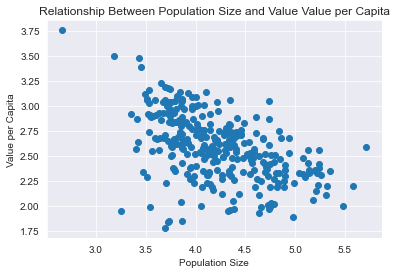

In [93]:
#plot a scatterplot with x as the population size, and y as the value per capita

#specify the type of plot and the columns to plot
plt.scatter(merged2['popsize_log10'],merged2['valpercap_log10'])

#specify the axis labels and the title
plt.xlabel('Population Size')
plt.ylabel('Value per Capita')
plt.title('Relationship Between Population Size and Value Value per Capita')

plt.show

<font color='darkblue'>
This graph shows the complete opposite of Question 6.4 as here there is a moderate negative correlation between the population size and the value per capita...so as the population size increases, the value per capita decreases. The pearson correlation coefficient here is -0.51 compared to that from Question 6.4 which is 0.76. This means that the population size has a stronger impact on the total value of procurements compared to the value per capita.

Additionally, the coefficient in Question 6.5 is 0.6674 (for total value) while for this question it is -0.333 (since it's using the value per capita instead). This confirms that the population size has a lower impact (and in the opposite direction...negative) on the value per capita compared to the total value of procurements. 

Note that this lower coefficient also results from the fact that the values per capita are lower than the total values in general. As a result, I added an intercept to my regression models to be able to see how the r-squared changes. The r-squared (coefficient of determination) is lower for the value per capita (0.257) compared to the total value (0.583) which means my model can explain more of the variation in the total value than it can the value per capita. In conclusion, the population size has a stronger impact on the total value.
</font> 

<b>[Step 7. | 2 point ]</b> Open Question. <br>
Given the dataset you have been exploring, and the analysis conducted over the municipalities procurement dataset with the population data. Can you think about a question that you consider interesting to explore? Does it require obtain additional from, for instace, pordata?

On this final step you have full control. Be creative and show us your ability to raise a question, identify which data you require to explore it, and report the results. Be as objective and clear as possible with your answer.

Use as many cells as necessary.

<font color='darkblue'>
Question 7:
</font>
Is there a relationship between the price and number of contracts in more attractive municipalities?
    (Given that we define attractive as the municipalites with the highest number of cultural facilities OR the highest revenue from tourist accommodations)
       
In other words, do more attractive municipalities (with higher number of cultural facilities or higher revenue from tourist accommodations) have a higher number of contracts and/or have more expensive contracts?
        
        Check in the year 2013, since it's the only data available at the moment in pordata while also being available in our dataset which includes the year 2013 (use only the year 2013 for both criteria for consistency and ability to compare). Visualize your findings.

<font color='darkblue'>
Data required:
</font>

- Total number of cultural facilities in the year 2013 for each municipality.
For this question, cultural facilities will include: number of museums, number of art galleries and number of venues for live performance
(This is because the most attractive cities in countries tend to be the capitals and the ones with the most cultural and artistic events. Thus, we can use number of cultural facilities as a criteria for the attractiveness of a municipality)

- Total revenue from tourist accommodations in the year 2013 per municipality.
Assuming that the higher the income received from tourist accommodations, the higher the number of incoming tourists,  the more attractive the city/municipality is. Thus, we can also use this as another criteria for the attractiveness of a municipality.


<font color='darkblue'>
Data sources:
</font>
- Number of Live Performance Venues per municipality
https://www.pordata.pt/en/DB/Municipalities/Search+Environment/Table
Use above link or click 'more options and data' then filter the data in the link below to only include Years=2013 and Geographical Group=Municipality (https://www.pordata.pt/en/Municipalities/Cultural+facilities+number-55)

- Number of Art Galleries per municipality
https://www.pordata.pt/en/DB/Municipalities/Search+Environment/Table
Use above link or click 'more options and data' then filter the data in the link below to only include Years=2013 and Geographical Group=Municipality 
https://www.pordata.pt/en/Municipalities/Art+galleries+and+other+places+for+temporary+exhibitions+places-58

- Number of Museums per Municipality
https://www.pordata.pt/en/DB/Municipalities/Search+Environment/Table
Use above link or click 'more options and data' then filter the data in the link below to only include Years=2013 and Geographical Group=Municipality 
https://www.pordata.pt/en/Municipalities/Museums+number-742

- Total Revenue from Tourist Accommodations per Municipality
https://www.pordata.pt/en/DB/Municipalities/Search+Environment/Table
Use above link or click 'more options and data' then filter the data in the link below to only include Years=2013 and Geographical Group=Municipality 
https://www.pordata.pt/en/Municipalities/Total+incomes+of+tourist+accommodations+total+and+by+type+of+establishment-769

<font color='darkblue'>
Note:
After getting the data from the links, I had to download it into an excel file and edit it. The only editing I did was remove the pictures with the logo of the website and their associated extra rows and columns. In order to avoid you having to do all this, I have included the excel files of the data I used in this question into the zip file of my submission.
</font>

In [95]:
#load the data (all data is for the year 2013 only)
tourism_df=pd.read_excel('tourism.xlsx','Table') 
artgalleries_df=pd.read_excel('artgalleries.xlsx','Table') 
venues_df=pd.read_excel('venues.xlsx','Table') 
museums_df=pd.read_excel('museums.xlsx','Table') 

In [96]:
#make the index of all dataframes equal to 'Municipality' column so we can concatenate them
tourism_df.set_index('Municipality',inplace=True)
artgalleries_df.set_index('Municipality',inplace=True)
venues_df.set_index('Municipality',inplace=True)
museums_df.set_index('Municipality',inplace=True)

In [97]:
#concatenate all 4 dataframes along the columns
step7data=pd.concat([artgalleries_df,venues_df,museums_df,tourism_df], axis=1, join='inner')
step7data.head()

,Numofgall,Numofvenues,numofmuseums,TotRev2013
Municipality,,,,
Arcos de Valdevez,1,1,0,795
Caminha,4,0,1,1658
Melgaço,2,0,1,1195
Monção,3,0,0,0
Paredes de Coura,1,1,1,0


In [98]:
#add a new column called 'TotNumofFac' (aka total number of cultural facilities) which sums the first 3 columns
step7data['TotNumofFac']= step7data['Numofgall']+ step7data['Numofvenues']+ step7data['numofmuseums']

#show the top of the dataframe
step7data.head()

,Numofgall,Numofvenues,numofmuseums,TotRev2013,TotNumofFac
Municipality,,,,,
Arcos de Valdevez,1,1,0,795,2
Caminha,4,0,1,1658,5
Melgaço,2,0,1,1195,3
Monção,3,0,0,0,3
Paredes de Coura,1,1,1,0,3


In [101]:
#reminder as to which dataframes can be handy to merge
merged1

,NIF,Municipality,Location,Population
0,500051054,Município de Almada,Almada,171 481
1,500051062,Município de Sintra,Sintra,379 860
2,500051070,Município de Lisboa,Lisboa,520 549
3,500745773,Município de Alcanena,Alcanena,13 490
4,500745943,Município de Oeiras,Oeiras,172 689
...,...,...,...,...
303,512074410,Município de Lagoa - Açores,Lagoa - Açores,14 636
304,512074771,Município de São Roque do Pico,São Roque do Pico,3 371
305,512074836,Município de Lajes das Flores,Lajes das Flores,1 527
306,512075506,Município das Velas,Velas,5 347


In [102]:
#reminder as to which dataframes can be handy to merge
municip_issuer_df

,idcontrato,tipoContrato,tipoprocedimento,objectoContrato,adjudicantes,adjudicatarios,dataPublicacao,dataCelebracaoContrato,precoContratual,cpv,prazoExecucao,localExecucao,fundamentacao,cpvDOC,CPV,issuerNIF,issuerName,supplierNIF,supplierName,average_price
0,845377,Empreitadas de obras públicas,Concurso público,AMBIENTE EM MATOSINHOS – CASA MORTUÁRIA DE LAVRA,501305912 - Município de Matosinhos,"500687030 - Valentim José Luís &amp; Filhos, S.A.",2013-10-03,2013-08-05,297423.55,45214200-2 - Construção de edifícios escolares,240,"Portugal, Porto, Matosinhos","Artigo 19.º, alínea b) do Código dos Contratos...",45214200-2,Construção de edifícios escolares,501305912,Município de Matosinhos,500687030,"- Valentim José Luís &amp; Filhos, S.A.",1239.264792
1,1297789,Empreitadas de obras públicas,Concurso público,Parque das Austrálias - Contrato n.º 5/2013,501305912 - Município de Matosinhos,"507488806 - NBO - Engenharia e Ambiente, S.A",2014-11-12,2013-01-29,292301.37,45112711-2 - Trabalhos de paisagismo em parques,90,"Portugal, Porto, Matosinhos","Artigo 19.º, alínea b) do Código dos Contratos...",45112711-2,Trabalhos de paisagismo em parques,501305912,Município de Matosinhos,507488806,"- NBO - Engenharia e Ambiente, S.A",3247.793000
2,801380,Empreitadas de obras públicas,Concurso público,ESPAÇO QUADRA - INOVAÇÃO E CRIATIVIDADE,501305912 - Município de Matosinhos,503590010 - QTCIVIL - ENGENHARIA E REABILITAÇÃ...,2013-07-25,2013-07-04,274702.31,45400000-1 - Obras de acabamento de edifícios,120,"Portugal, Porto, Matosinhos","Artigo 19.º, alínea b) do Código dos Contratos...",45400000-1,Obras de acabamento de edifícios,501305912,Município de Matosinhos,503590010,"- QTCIVIL - ENGENHARIA E REABILITAÇÃO, S.A.",2289.185917
3,790849,Empreitadas de obras públicas,Concurso público,ESTAR PERTO DAS PESSOAS: HABITAÇÃO SOCIAL - CO...,501305912 - Município de Matosinhos,504125567 - PEDRIFIEL – Sociedade de Exploraçã...,2013-07-09,2013-07-02,179903.20,45110000-1 - Demolição e destruição de edifíci...,210,"Portugal, Porto, Matosinhos","Artigo 19.º, alínea b) do Código dos Contratos...",45110000-1,Demolição e destruição de edifícios e movimen...,501305912,Município de Matosinhos,504125567,- PEDRIFIEL – Sociedade de Exploração de Grani...,856.681905
4,1011545,Aquisição de serviços | Empreitadas de obras p...,Concurso público,Valorizar as pessoas: educação – EB1/JI da Igr...,501305912 - Município de Matosinhos,"501314920 - Cunha &amp; Barroso, Lda",2014-03-19,2013-11-04,1562194.41,45214200-2 - Construção de edifícios escolares...,365,"Portugal, Porto, Matosinhos","Artigo 19.º, alínea b) do Código dos Contratos...",45214200-2,Construção de edifícios escolares | 507000002...,501305912,Município de Matosinhos,501314920,"- Cunha &amp; Barroso, Lda",4279.984685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61454,1268062,Aquisição de serviços,Ajuste Direto Regime Geral,Aquisição de serviços relacionados com o Ensin...,507012100 - Município da Nazaré,209398833 - Alberto Santos Lopes Valongo,2014-10-13,2014-10-08,1200.00,80000000-4 - Serviços de ensino e formação,90,"Portugal, Leiria, Nazaré","Artigo 20.º, n.º 1, alínea a) do Código dos Co...",80000000-4,Serviços de ensino e formação,507012100,Município da Nazaré,209398833,- Alberto Santos Lopes Valongo,13.333333
61455,1268064,Aquisição de serviços,Ajuste Direto Regime Geral,Aquisição de serviços relacionados com a Música,507012100 - Município da Nazaré,194627594 - Rui Manuel Carreira Fragata,2014-10-13,2014-10-08,1800.00,80000000-4 - Serviços de ensino e formação,90,"Portugal, Leiria, Nazaré","Artigo 20.º, n.º 1, alínea a) do Código dos Co...",80000000-4,Serviços de ensino e formação,507012100,Município da Nazaré,194627594,- Rui Manuel Carreira Fragata,20.000000
61456,3755929,Aquisição de bens móveis,Ajuste Direto Regime Geral,AQUISIÇÃO DE BENS MÓVEIS,507012100 - Município da Nazaré,"506439119 - Simocerro, Lda.",2017-10-10,2014-12-15,14600.00,34952000-5 - Plataformas hidráu

In [103]:
#Need to extract only the 2013 contracts from our original dataset 

#filter out the following column to deal with a smaller dataframe and store them in the variable value2
value2=municip_issuer_df.loc[:,["dataCelebracaoContrato","precoContratual","issuerNIF"]]

#convert the dataCelebracaoContrato column into years only instead of a full date
value2["dataCelebracaoContrato"]= value2["dataCelebracaoContrato"].map(lambda x:x.year)

#filter out only the year 2013
value2=value2.loc[value2['dataCelebracaoContrato']== 2013]

#show the top of this dataframe
value2.head()


,dataCelebracaoContrato,precoContratual,issuerNIF
0,2013,297423.55,501305912
1,2013,292301.37,501305912
2,2013,274702.31,501305912
3,2013,179903.20,501305912
4,2013,1562194.41,501305912


In [104]:
#calculate the total value of procurements by grouping by the issuerNIF and summing all the associated prices
#save this data in a series called totval2 (which has as issuerNIF the index)
totval2=value2.groupby('issuerNIF')['precoContratual'].sum()

#calculate the number of procurements by grouping by the issuerNIF and counting all the associated entries 
#save this data in a series called numproc2 (which has as issuerNIF the index)
numproc2=value2.groupby('issuerNIF')['precoContratual'].count()

#set the index of the value2 dataframe to issuerNIF so you can add to it the above created series as columns
value2.set_index('issuerNIF',inplace=True)

#add the above created series as columns to the value2 dataframe
value2['Total Value of Issued Procurements']=totval2
value2['Number of Issued Procurements']=numproc2

#show the top of this dataframe
value2.head()

,dataCelebracaoContrato,precoContratual,Total Value of Issued Procurements,Number of Issued Procurements
issuerNIF,,,,
501305912,2013,297423.55,18558402.26,176
501305912,2013,292301.37,18558402.26,176
501305912,2013,274702.31,18558402.26,176
501305912,2013,179903.20,18558402.26,176
501305912,2013,1562194.41,18558402.26,176


In [105]:
#merge this dataframe with the merged1 dataframe on column NIF 
step7merge1=pd.merge(value2,merged1,how='inner',left_on='issuerNIF',right_on='NIF')

#drop all unnecessary columns
step7merge1=step7merge1.drop(['dataCelebracaoContrato','precoContratual','Municipality','Population','NIF'],axis=1)

#set the 'Location' column as the index in order to be able to merge it again later
#step7merge1.set_index('Location',inplace=True)

#drop all the duplicate data (we should now have 308 rows)
step7merge1.drop_duplicates(inplace=True)

step7merge1

,Total Value of Issued Procurements,Number of Issued Procurements,Location
0,1.855840e+07,176,Matosinhos
176,9.882641e+05,21,Praia da Vitória
197,8.037944e+07,1092,Lisboa
1289,3.037822e+06,34,Câmara de Lobos
1323,4.894210e+06,148,Viseu
...,...,...,...
21051,8.058502e+05,14,Bombarral
21065,7.458585e+04,1,Fornos de Algodres
21066,1.265574e+05,5,São Vicente
21071,1.419416e+05,2,Calheta São Jorge


In [106]:
#reset the index for editing and merging 
step7data.reset_index(inplace=True)

#check to see the dataframe
step7data.head()

,Municipality,Numofgall,Numofvenues,numofmuseums,TotRev2013,TotNumofFac
0,Arcos de Valdevez,1,1,0,795,2
1,Caminha,4,0,1,1658,5
2,Melgaço,2,0,1,1195,3
3,Monção,3,0,0,0,3
4,Paredes de Coura,1,1,1,0,3


In [107]:
#merge again but with the culture dataset (step7data) which we otained at the beginning of the question 
#step7merge2 = step7merge1.merge(step7data, left_index=True, right_index=True)
step7merge2 = step7merge1.merge(step7data, left_on='Location', right_on='Municipality',how='inner')

#drop all unnecessary columns
step7merge2=step7merge2.drop(['Numofgall','Numofvenues','numofmuseums'],axis=1)

step7merge2
#as you can see we have only 301 rows which means we are missing 7 values

,Total Value of Issued Procurements,Number of Issued Procurements,Location,Municipality,TotRev2013,TotNumofFac
0,1.855840e+07,176,Matosinhos,Matosinhos,9598,14
1,8.037944e+07,1092,Lisboa,Lisboa,415638,222
2,3.037822e+06,34,Câmara de Lobos,Câmara de Lobos,0,8
3,4.894210e+06,148,Viseu,Viseu,5718,16
4,1.923027e+06,30,Batalha,Batalha,1651,2
...,...,...,...,...,...,...
296,5.625826e+05,12,Machico,Machico,5981,8
297,8.058502e+05,14,Bombarral,Bombarral,120,3
298,7.458585e+04,1,Fornos de Algodres,Fornos de Algodres,0,1
299,1.265574e+05,5,São Vicente,São Vicente,3498,0


In [108]:
#the following are the missing 7 values
step7data[~step7data['Municipality'].isin(list(step7merge1['Location']))]

,Municipality,Numofgall,Numofvenues,numofmuseums,TotRev2013,TotNumofFac
131,Castanheira de Pêra,2,0,1,0,3
157,Vila Velha de Ródão,1,0,1,0,2
228,Coruche,2,2,1,0,5
279,Lagoa [R.A.A.],1,1,1,1230,3
286,Vila da Praia da Vitória,1,2,0,1447,3
288,Calheta [R.A.A.],1,0,1,0,2
297,Calheta [R.A.M.],2,1,0,8058,3


In [109]:
#rename all the missing values in the step7data dataframe to match those in the step7merge1 dataframe so we can merge them too
step7data['Municipality']=step7data['Municipality'].str.replace('Castanheira de Pêra','Castanheira de Pera')
step7data['Municipality']=step7data['Municipality'].str.replace('Vila Velha de Ródão','Vila Velha de Rádío')
step7data['Municipality']=step7data['Municipality'].str.replace('Coruche','Coruche – Câmara Municipal')
step7data['Municipality']=step7data['Municipality'].str.replace('Lagoa \[R.A.A.\]','Lagoa - Açores')
step7data['Municipality']=step7data['Municipality'].str.replace('Vila da Praia da Vitória','Praia da Vitória')
step7data['Municipality']=step7data['Municipality'].str.replace('Calheta \[R.A.A.\]','Calheta São Jorge')
step7data['Municipality']=step7data['Municipality'].str.replace('Calheta \[R.A.M.\]','Calheta')

In [110]:
#repeat merge (we should now finally have the 308 rows)
step7merge2 = step7merge1.merge(step7data, left_on='Location', right_on='Municipality',how='inner')

#drop all unnecessary columns
step7merge2=step7merge2.drop(['Numofgall','Numofvenues','numofmuseums','Location'],axis=1)

step7merge2
#we finally have our 308 rows

,Total Value of Issued Procurements,Number of Issued Procurements,Municipality,TotRev2013,TotNumofFac
0,1.855840e+07,176,Matosinhos,9598,14
1,9.882641e+05,21,Praia da Vitória,1447,3
2,8.037944e+07,1092,Lisboa,415638,222
3,3.037822e+06,34,Câmara de Lobos,0,8
4,4.894210e+06,148,Viseu,5718,16
...,...,...,...,...,...
303,8.058502e+05,14,Bombarral,120,3
304,7.458585e+04,1,Fornos de Algodres,0,1
305,1.265574e+05,5,São Vicente,3498,0
306,1.419416e+05,2,Calheta São Jorge,0,2


Criteria 1: Total Number of Cultural Facilities

In [151]:
#calculates the pearson correlation between number of cultural facilities and price of contracts
float(step7merge2['TotNumofFac'].corr(step7merge2['Total Value of Issued Procurements']))

#The Pearson correlation value is very high so there is a strong positive correlation. Meaning that the more cultural
#cultural facilities a municipality has, the more expensive its contracts tend to be

0.8256356611142557

<function matplotlib.pyplot.show(*args, **kw)>

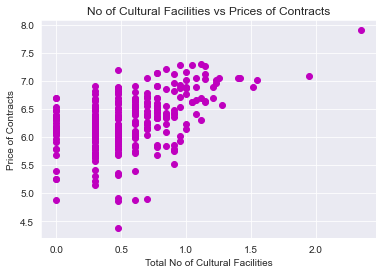

In [115]:
#I used the logarithms for better comparison and visualization

#plot a scatterplot with x as the total number of cultural facilities, and y as the total value of issued procurements

#specify the type of plot and the columns to plot
plt.scatter(np.log10(step7merge2['TotNumofFac']),np.log10(step7merge2['Total Value of Issued Procurements']),color='m')

#specify the axis labels and title
plt.xlabel('Total No of Cultural Facilities')
plt.ylabel('Price of Contracts')
plt.title('No of Cultural Facilities vs Prices of Contracts')

plt.show



<font color='darkblue'>  
CONCLUSION

The Pearson correlation value is very high (0.826) so there is a very strong positive correlation. Meaning that the more cultural facilities a municipality has, the more expensive the contracts tend to be in it. 

Indeed, the number of cultural facilities has a very strong impact on the prices of the contracts. Thus, the more 
attractive a municipality is (higher number of cultural facilities), the more expensive its contracts are.
</font> 

In [153]:
#calculates the pearson correlation between number of cultural facilities and number of contracts issued
float(step7merge2['TotNumofFac'].corr(step7merge2['Number of Issued Procurements']))

0.7636537940624992

<function matplotlib.pyplot.show(*args, **kw)>

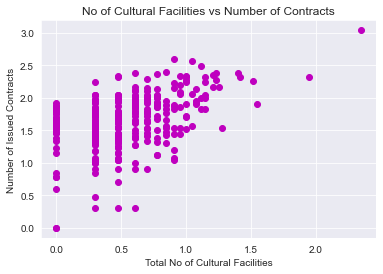

In [112]:
#I used the logarithms for better comparison and visualization

#plot a scatterplot with x as the total number of cultural facilities, and y as the total number of issued procurements

#specify the type of plot and the columns to plot
plt.scatter(np.log10(step7merge2['TotNumofFac']),np.log10(step7merge2['Number of Issued Procurements']),color='m')

#specify the axis labels and title
plt.xlabel('Total No of Cultural Facilities')
plt.ylabel('Number of Issued Contracts')
plt.title('No of Cultural Facilities vs Number of Contracts')

plt.show
             

<font color='darkblue'>
CONCLUSION:

The Pearson correlation value is quite high (0.764) so there is a strong positive correlation. Meaning that the more cultural facilities a municipality has, the more contracts tend to be issued in it. 

Note that the pearson correlation is lower than the one above (0.825) which means that the number of cultural 
facilities has a stronger impact on the price of the contracts rather than the number of the contracts.

Indeed, the more attractive a municipality is (higher number of cultural facilities), the higher the number of 
contracts issued in it.
</font>  

Criteria 2: Total Revenue from Tourism

In [165]:
#calculates the pearson correlation between revenue from tourism and prices of contracts issued
float(step7merge2['TotRev2013'].corr(step7merge2['Total Value of Issued Procurements']))

0.7020809044840672

<function matplotlib.pyplot.show(*args, **kw)>

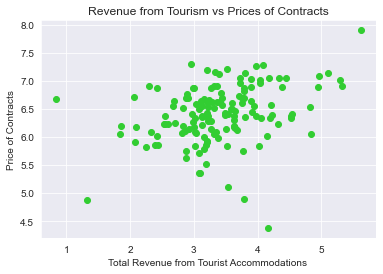

In [116]:
#I used the logarithms for better comparison and visualization

#plot a scatterplot with x as the total revenue from tourist accommodations, and y as the total value of issued procurements

#specify the type of plot and the columns to plot
plt.scatter(np.log10(step7merge2['TotRev2013']),np.log10(step7merge2['Total Value of Issued Procurements']),color='limegreen')

#specify the axis labels and title
plt.xlabel('Total Revenue from Tourist Accommodations ')
plt.ylabel('Price of Contracts')
plt.title('Revenue from Tourism vs Prices of Contracts')

plt.show

<font color='darkblue'>
CONCLUSION

The Pearson correlation value is quite high (0.702) so there is a strong positive correlation. Meaning that the 
higher the revenue from tourism a municipality receives, the higher the prices of contracts tend to be in it. 

Indeed, the revenue from tourism has a strong impact on the prices of the contracts. Thus, the more attractive a municipality is (receives higher revenue from tourist accommodations), the more expensive its contracts are.
</font>

In [114]:
#calculates the pearson correlation between revenue from tourism and number of contracts issued
float(step7merge2['TotRev2013'].corr(step7merge2['Number of Issued Procurements']))

#The Pearson correlation value is quite high so there is a strong positive correlation. Meaning that the higher the 
#revenue from tourism a municipality has, the higher the prices of contracts tend to be in it. 

0.6376844678093251

<function matplotlib.pyplot.show(*args, **kw)>

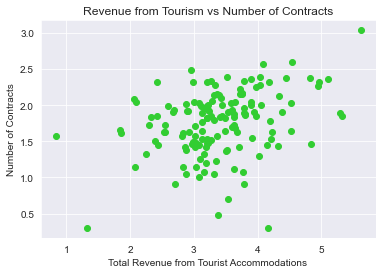

In [117]:
#I used the logarithms for better comparison and visualization

#plot a scatterplot with x as the total revenue from tourist accommodations, and y as the total number of issued procurements

#specify the type of plot and the columns to plot
plt.scatter(np.log10(step7merge2['TotRev2013']),np.log10(step7merge2['Number of Issued Procurements']),color='limegreen')

#specify the axis labels and title
plt.xlabel('Total Revenue from Tourist Accommodations ')
plt.ylabel('Number of Contracts')
plt.title('Revenue from Tourism vs Number of Contracts')

plt.show

<font color='darkblue'>
CONCLUSION

The Pearson correlation value is quite moderate (0.638) so there is a moderate positive correlation. Meaning that the more cultural higher the revenue from tourism a municipality receives, the more contracts tend to be issued in it. 

Note that the pearson correlation is lower than the one above (0.702) which means that the revenue from tourism has
a stronger impact on the price of the contracts rather than the number of the contracts.

Indeed, the more attractive a municipality is (receives higher revenue from tourist accommodations), the higher the 
number of contracts issued in it.
</font>

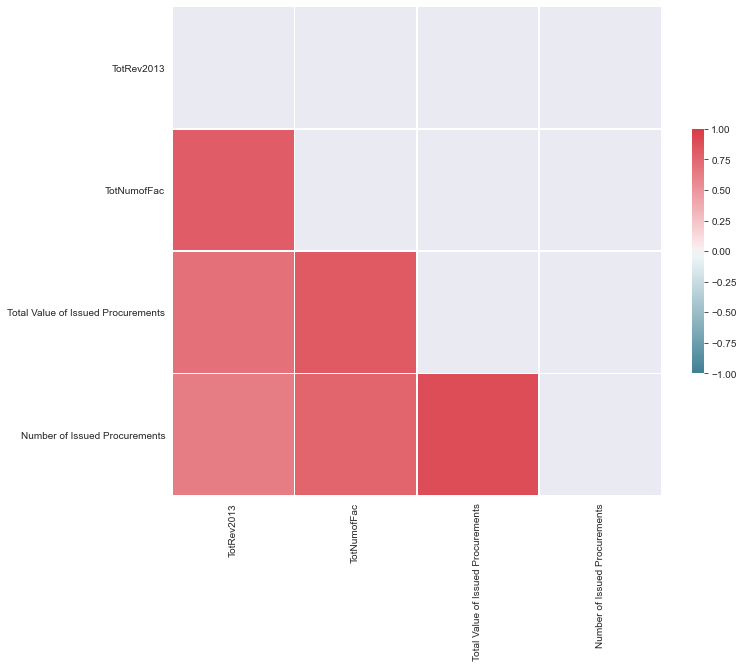

In [147]:
#Make a heatmap to show the correlations among all the variables in a more global view (using colour)

#calculate the correlation matrix
corr = step7merge2[["TotRev2013","TotNumofFac","Total Value of Issued Procurements","Number of Issued Procurements"]].corr()

#make a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

#set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

#make a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)


#draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

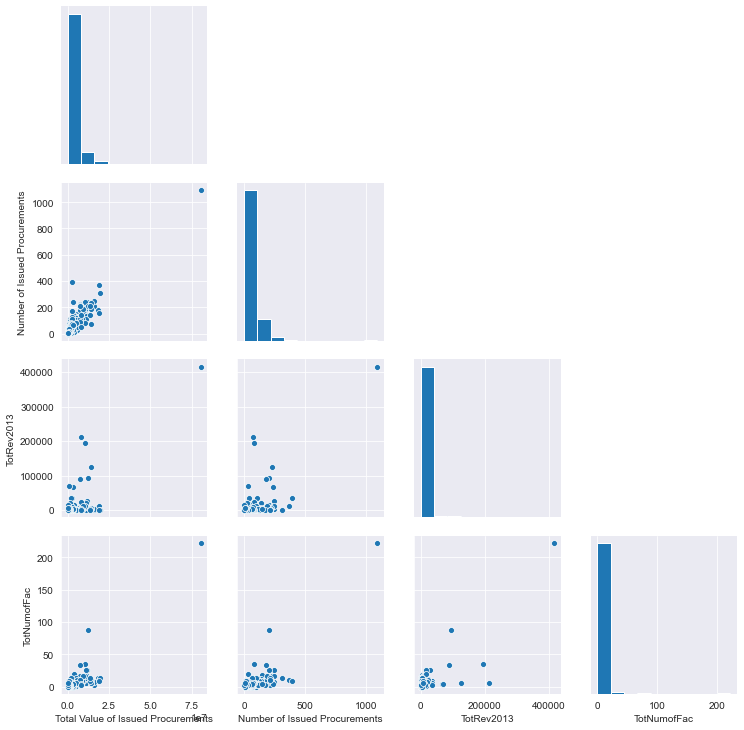

In [148]:
#create a pairplot to show the correlations among all the variables in a more global view (using scatter points)
sns.pairplot(step7merge2,corner=True)

In [ ]:
#Obviously, all variables have strong positive correlations with each other. The correlation between 
#Total Number of Cultural Facilities and Total Value of Issued Procurements is the strongest.

<font color='darkblue'>
ANSWER:

Yes, there is a relationship between the price and number of contracts AND the attractiveness of a municipality.

The correlation is strong and positive. Thus, the more attractive a municipality is, the higher the number of contracts issued in it and the higher the prices of these contracts.

Additional findings:
1. The attractiveness of a municipality has a stronger impact on the prices of the contracts than it does on the number of contracts.

2. Criteria 1 (total number of cultural facilities) has a stronger impact on both the prices and numbers of contracts than Criteria 2 (total revenue from tourist accommodations) does.   
</font>

<font color='blue'>
P.S. I chose this topic because I have a soft spot for arts and creativity ;) 
Although I was scared of the question, it became my favourite because I really started to feel and experience what it's like to be an artist data scientist who makes discoveries and explorations freely based on the colourful and realistic data (aka restrictions) they have available...obrigada for this and the semester!! :)
</font> 

## End

Submit this notebook in Moodle along with a statement of authorship in a single .zip archive.